# Import Library

In [ ]:
#import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
# from sklearn2pmml import PMMLPipeline
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
faskes=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/dinkes-od_15936_jumlah_fasilitas_kesehatan_berdasarkan_jenis_data(2019).csv')
dfwis=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/disparbud-od_15361_jml_pengunjung_kawasan_pariwisata__jenis_wisatawan_data.csv')
dfodtw=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/disparbud-od_15387_jml_ptns_obyek_daya_tarik_wisata_odtw__jenis_data.csv')
dfrek=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/disparbud-od_15420_jml_pengunjung_tempat_rekreasi__jenis_wisatawan_data.csv')
dfcovjabar=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/satgas-covid-19-dp_cvd_agregat_kasus_terkonfirmasi_covid19_kabkota_jabar_data.csv')
dfrs=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/satgas-covid-19-dp_cvd_bor_data_rs_data.csv')
dfcov2021=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/Data COVID-19 Jawa Barat.csv')
df_totpend=pd.read_csv('/content/gdrive/MyDrive/KLASA_CAPSTONE/dataset/berapa-jumlah-penduduk-jawa-barat.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

## Data Cleaning Covid Jabar

In [ ]:
dfcovjabar.head()

,tanggal,kode_kab_kota,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,konfirmasi_total_daily_growth,konfirmasi_sembuh_daily_growth,konfirmasi_meninggal_daily_growth,konfirmasi_aktif_daily_growth,kota_kab_belum_teridentifikasi,sembuh_unidentified,meninggal_unidentified,id
0,2020-03-01 00:00:00,32,jawa barat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1
1,2020-03-01 00:00:00,3204,Kabupaten Bandung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2
2,2020-03-01 00:00:00,3217,Kabupaten Bandung Barat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3
3,2020-03-01 00:00:00,3216,Kabupaten Bekasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4
4,2020-03-01 00:00:00,3201,Kabupaten Bogor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,5


In [ ]:
#view data info
dfcovjabar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18704 entries, 0 to 18703
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tanggal                            18704 non-null  object 
 1   kode_kab_kota                      18704 non-null  int64  
 2   nama_kab_kota                      18704 non-null  object 
 3   konfirmasi_total                   18036 non-null  float64
 4   konfirmasi_sembuh                  18036 non-null  float64
 5   konfirmasi_meninggal               18036 non-null  float64
 6   konfirmasi_aktif                   18036 non-null  float64
 7   konfirmasi_total_daily_growth      18036 non-null  float64
 8   konfirmasi_sembuh_daily_growth     18036 non-null  float64
 9   konfirmasi_meninggal_daily_growth  18036 non-null  float64
 10  konfirmasi_aktif_daily_growth      18036 non-null  float64
 11  kota_kab_belum_teridentifikasi     668 non-null    flo

In [ ]:
#change data type
dfcovjabar['tanggal']=dfcovjabar['tanggal'].astype('datetime64[ns]')

In [ ]:
#fill null values with 0
dfcovjabar=dfcovjabar.fillna(0)

In [ ]:
#no duplicate values
dfcovjabar.duplicated().sum()

0

In [ ]:
dfcovjabar = dfcovjabar[dfcovjabar.nama_kab_kota  != 'jawa barat']

In [ ]:
dfcovjabar['nama_kab_kota'].value_counts()

Kabupaten Subang           668
Kabupaten Bandung          668
Kabupaten Garut            668
Kota Cirebon               668
Kabupaten Cirebon          668
Kabupaten Bandung Barat    668
Kabupaten Tasikmalaya      668
Kabupaten Cianjur          668
Kabupaten Bekasi           668
Kabupaten Majalengka       668
Kabupaten Sukabumi         668
Kabupaten Purwakarta       668
Kabupaten Bogor            668
Kota Cimahi                668
Kabupaten Ciamis           668
Kota Tasikmalaya           668
Kabupaten Indramayu        668
Kota Bandung               668
Kabupaten Sumedang         668
Kota Depok                 668
Kabupaten Karawang         668
Kota Bogor                 668
Kota Banjar                668
Kabupaten Kuningan         668
Kabupaten Pangandaran      668
Kota Sukabumi              668
Kota Bekasi                668
Name: nama_kab_kota, dtype: int64

In [ ]:
list = [3623790, 1788340, 3113020, 5427070, 1229070, 2477560, 2270620,2585610,1834430,2439090,1167690,1305480,423670,997870,1595320,2725450,1152510,1865200,2444160,200970,2543680,1043070,568400,333300,2056340,346330,716160]
data = pd.DataFrame(list)
data.rename(columns={0 : "jumlah_penduduk"}, inplace=True)

In [ ]:
data

,jumlah_penduduk
0,3623790
1,1788340
2,3113020
3,5427070
4,1229070
5,2477560
6,2270620
7,2585610
8,1834430
9,2439090


## Data Cleaning Tempat Rekreasi





In [ ]:
dfrek.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,0,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,0,ORANG,2014
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,2849,ORANG,2014
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,111947,ORANG,2014
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,36518,ORANG,2014


In [ ]:
#view data info
dfrek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   376 non-null    int64 
 1   kode_provinsi        376 non-null    int64 
 2   nama_provinsi        376 non-null    object
 3   kode_kabupaten_kota  376 non-null    int64 
 4   nama_kabupaten_kota  376 non-null    object
 5   jenis_wisatawan      376 non-null    object
 6   jumlah_pengunjung    376 non-null    int64 
 7   satuan               376 non-null    object
 8   tahun                376 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 26.6+ KB


In [ ]:
#check null values
dfrek.isna().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_wisatawan        0
jumlah_pengunjung      0
satuan                 0
tahun                  0
dtype: int64

In [ ]:
#check duplicated values
dfrek.duplicated().sum()

0

## Data Cleaning Faskes

In [ ]:
faskes.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_faskes,jumlah_faskes,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT UMUM,9,UNIT,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT KHUSUS,0,UNIT,2018
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,RUMAH SAKIT BERSALIN,0,UNIT,2018
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,PUSKESMAS,62,UNIT,2018
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,POSYANDU,4927,UNIT,2018


In [ ]:
faskes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   270 non-null    int64 
 1   kode_provinsi        270 non-null    int64 
 2   nama_provinsi        270 non-null    object
 3   kode_kabupaten_kota  270 non-null    int64 
 4   nama_kabupaten_kota  270 non-null    object
 5   jenis_faskes         270 non-null    object
 6   jumlah_faskes        270 non-null    int64 
 7   satuan               270 non-null    object
 8   tahun                270 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 19.1+ KB


In [ ]:
faskes.isna().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_faskes           0
jumlah_faskes          0
satuan                 0
tahun                  0
dtype: int64

# Data Exploration

In [ ]:
#create new year column for future grouping
dfcovjabar['tahun'] = pd.DatetimeIndex(dfcovjabar['tanggal']).year

In [ ]:
dfcovjabar['tahun'].value_counts()

2021    9774
2020    8262
Name: tahun, dtype: int64

In [ ]:
#create new dataframe based on year
cov2020=dfcovjabar[dfcovjabar['tahun']==2020]
cov2019=dfcovjabar[dfcovjabar['tahun']==2019]
cov2018=dfcovjabar[dfcovjabar['tahun']==2018]

In [ ]:
#group by kab/kota
cov2020g=cov2020.groupby(['nama_kab_kota']).sum().reset_index()
cov2019g=cov2019.groupby(['nama_kab_kota']).sum().reset_index()
cov2018g=cov2018.groupby(['nama_kab_kota']).sum().reset_index()

In [ ]:
#group by tahun on reccreation data
dfrek20=dfrek[dfrek['tahun']==2020]
dfrek19=dfrek[dfrek['tahun']==2019]
dfrek18=dfrek[dfrek['tahun']==2018]

In [ ]:
#group by tahun on reccreation data 
faskes2=faskes[faskes['tahun']==2018]

In [ ]:
faskes2.shape

(135, 9)

##Exploration of data covid (opendata jabar based)

In [ ]:
cov2020.head()

,tanggal,kode_kab_kota,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,konfirmasi_total_daily_growth,konfirmasi_sembuh_daily_growth,konfirmasi_meninggal_daily_growth,konfirmasi_aktif_daily_growth,kota_kab_belum_teridentifikasi,sembuh_unidentified,meninggal_unidentified,id,tahun
1,2020-03-01,3204,Kabupaten Bandung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2020
2,2020-03-01,3217,Kabupaten Bandung Barat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2020
3,2020-03-01,3216,Kabupaten Bekasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2020
4,2020-03-01,3201,Kabupaten Bogor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2020
5,2020-03-01,3207,Kabupaten Ciamis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2020


In [ ]:
name_set = ['Kota Bandung', 'Kabupaten Bandung', 'Kota Bogor', 'Kabupaten Bogor', 'Kota Sukabumi']
cov2020p= cov2020.loc[cov2020['nama_kab_kota'].isin(name_set)]

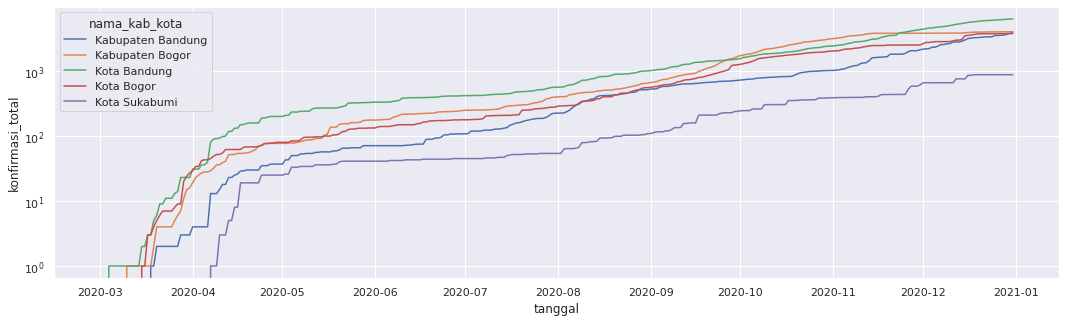

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(10,6)})
ax= sns.lineplot(x='tanggal', y='konfirmasi_total', hue='nama_kab_kota', data=cov2020p)
ax.set_yscale("log")

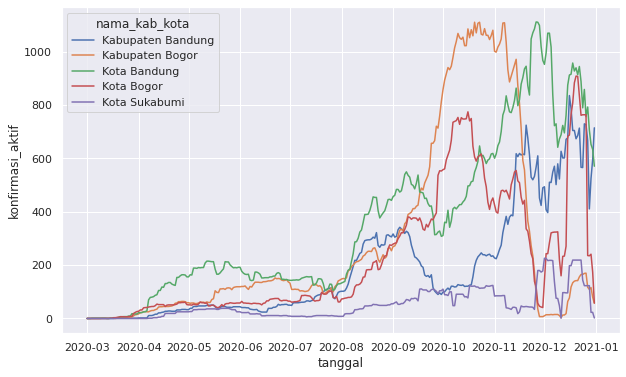

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(9,5)})
ax= sns.lineplot(x='tanggal', y='konfirmasi_aktif', hue='nama_kab_kota', data=cov2020p)

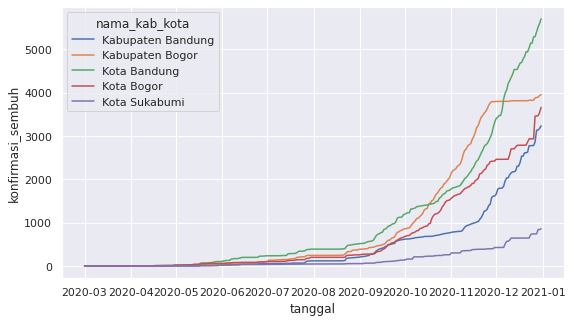

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(9,5)})
ax= sns.lineplot(x='tanggal', y='konfirmasi_sembuh', hue='nama_kab_kota', data=cov2020p)

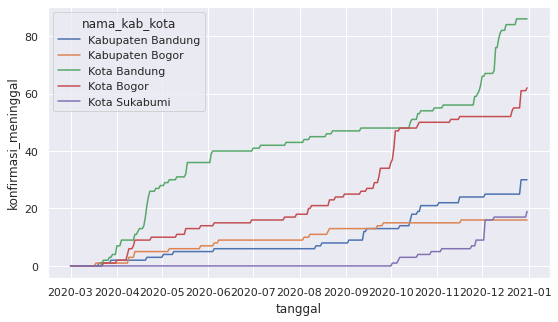

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(9,5)})
ax= sns.lineplot(x='tanggal', y='konfirmasi_meninggal', hue='nama_kab_kota', data=cov2020p)

In [ ]:
# #grup by kabupaten kota
# df_cov_kt=dfcovjabar.groupby(['nama_kab_kota']).sum()[['konfirmasi_total']]
# dfj=dfj.sort_values('konfirmasi_pengunjung',ascending=False).rename(columns={'jumlah_pengunjung':'pengunjung_2020'}).reset_index()
# dfjh=dfj.head(5)
# dfjh.plot.bar(x='nama_kabupaten_kota',y='pengunjung_2020')
# plt.xticks(rotation=30, ha='right')

## Exploration of data jumlah pengunjung


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

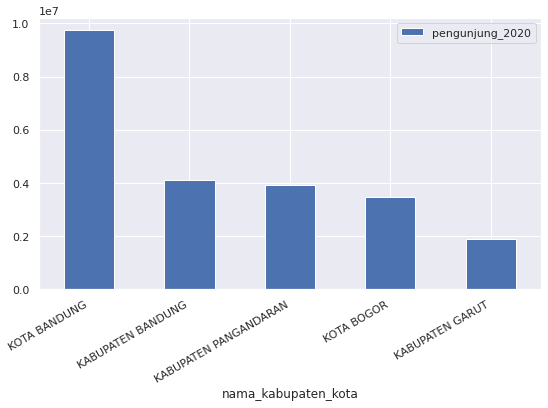

In [ ]:
#grup by kabupaten kota
dfj=dfrek20.groupby(['nama_kabupaten_kota']).sum()[['jumlah_pengunjung']]
dfj=dfj.sort_values('jumlah_pengunjung',ascending=False).rename(columns={'jumlah_pengunjung':'pengunjung_2020'}).reset_index()
dfjh=dfj.head(5)
dfjh.plot.bar(x='nama_kabupaten_kota',y='pengunjung_2020')
plt.xticks(rotation=30, ha='right')

- Top 5 Kota atau kabupaten dengan jumlah pengunjung tertinggi Kota Bandung, Kabupaten Bandung, Kabupaten Pangandaran, Kota Bogor, Kabupaten Garut.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

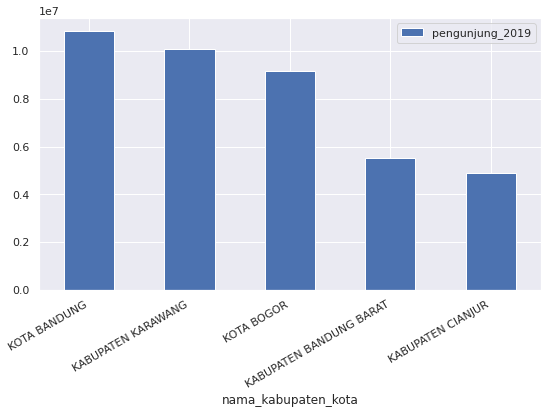

In [ ]:
#group by kabupaten kota
dfk=dfrek19.groupby(['nama_kabupaten_kota']).sum()[['jumlah_pengunjung']]
dfk=dfk.sort_values('jumlah_pengunjung',ascending=False).rename(columns={'jumlah_pengunjung':'pengunjung_2019'}).reset_index()
dfkh=dfk.head(5)
dfkh.plot.bar(x='nama_kabupaten_kota',y='pengunjung_2019')
plt.xticks(rotation=30, ha='right')

- Top 5 Kota atau kabupaten dengan jumlah pengunjung tertinggi adalah Kota Bandung, Kabupaten Karawang, Kota Bogor,Kabupaten Bandung Barat, Kabupaten Cianjur.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

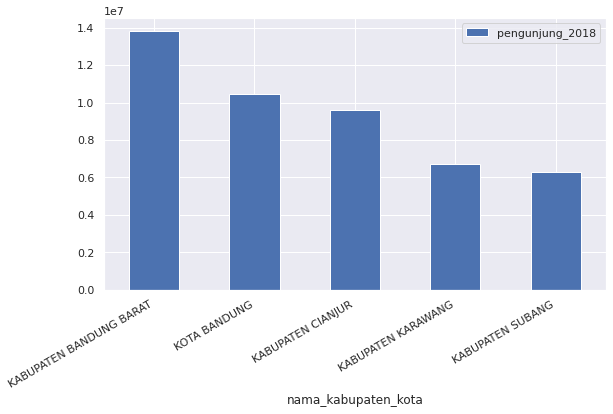

In [ ]:
#group by kabupaten kota
dfl=dfrek18.groupby(['nama_kabupaten_kota']).sum()[['jumlah_pengunjung']]
dfl=dfl.sort_values('jumlah_pengunjung',ascending=False).rename(columns={'jumlah_pengunjung':'pengunjung_2018'}).reset_index()
dflh=dfl.head(5)
dflh.plot.bar(x='nama_kabupaten_kota',y='pengunjung_2018')
plt.xticks(rotation=30, ha='right')

- Top 5 Kota atau kabupaten dengan jumlah pengunjung tertinggi Kabupaten Bandung Barat, Kota Bandung, Kabupaten Cianjur, Kabupaten Karawang , Kabupaten Subang.

In [ ]:
#tahun2
tahun2 = pd.merge(dfj,dfk,  how='left', left_on=['nama_kabupaten_kota'], right_on = ['nama_kabupaten_kota'])
tahuncopy=tahun2.copy()
tahun2['delta']=((tahun2['pengunjung_2020']-tahun2['pengunjung_2019'])/tahun2['pengunjung_2019'])*100

In [ ]:
#view data
tahun2.sort_values(by='delta',ascending=True).reset_index(drop=True)

,nama_kabupaten_kota,pengunjung_2020,pengunjung_2019,delta
0,KABUPATEN BOGOR,28376,2696467,-9.894766e+01
1,KOTA TASIKMALAYA,48634,1251301,-9.611333e+01
2,KOTA BANJAR,15977,141556,-8.871330e+01
3,KABUPATEN INDRAMAYU,230154,1501152,-8.466817e+01
4,KABUPATEN KARAWANG,1737979,10080168,-8.275843e+01
5,KABUPATEN BANDUNG BARAT,1420031,5517072,-7.426115e+01
6,KABUPATEN CIANJUR,1496808,4900805,-6.945792e+01
7,KABUPATEN SUBANG,395371,1294337,-6.945378e+01
8,KOTA CIREBON,653328,1825195,-6.420503e+01
9,KOTA BOGOR,3457722,9160884,-6.225559e+01


- Sebagian besar kota dan kabupaten di jawa barat mengalami penurunan pengunjung tempat rekreasi

In [ ]:
#tahun2
tahun3 = pd.merge(tahuncopy,dfl,  how='left', left_on=['nama_kabupaten_kota'], right_on=['nama_kabupaten_kota'])
tahun3

,nama_kabupaten_kota,pengunjung_2020,pengunjung_2019,pengunjung_2018
0,KOTA BANDUNG,9730878,10853314,10472498
1,KABUPATEN BANDUNG,4113427,2579578,2061011
2,KABUPATEN PANGANDARAN,3940506,3227296,7850
3,KOTA BOGOR,3457722,9160884,226934
4,KABUPATEN GARUT,1909892,2922225,2787756
5,KABUPATEN BEKASI,1826774,2095542,2088299
6,KABUPATEN KARAWANG,1737979,10080168,6707383
7,KABUPATEN CIANJUR,1496808,4900805,9592520
8,KABUPATEN KUNINGAN,1469115,428019,2313784
9,KABUPATEN SUKABUMI,1421950,977975,3666941


In [ ]:
tahun3[tahun3['nama_kabupaten_kota']=='KOTA BANDUNG']

,nama_kabupaten_kota,pengunjung_2020,pengunjung_2019,pengunjung_2018
0,KOTA BANDUNG,9730878,10853314,10472498


(array([0]), <a list of 1 Text major ticklabel objects>)

<Figure size 1080x720 with 0 Axes>

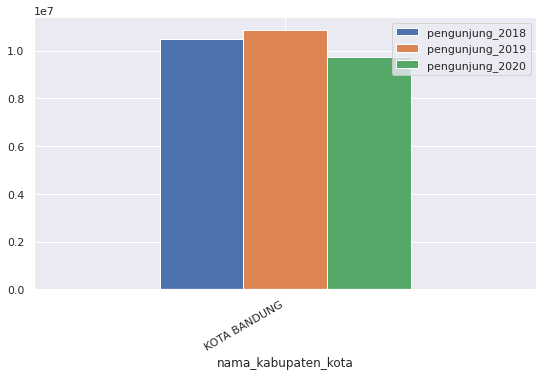

In [ ]:
plt.figure(figsize=[15,10])
kotabandung=tahun3[tahun3['nama_kabupaten_kota']=='KOTA BANDUNG']
kotabandung.plot.bar(x='nama_kabupaten_kota',y=['pengunjung_2018','pengunjung_2019','pengunjung_2020'])
plt.xticks(rotation=30, ha='right')

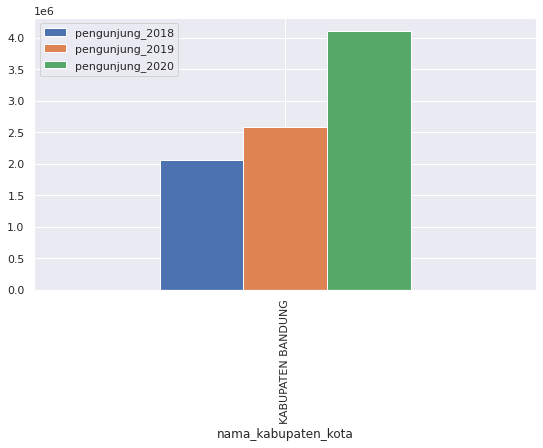

In [ ]:
kabbandung=tahun3[tahun3['nama_kabupaten_kota']=='KABUPATEN BANDUNG']
kabbandung.plot.bar(x='nama_kabupaten_kota',y=['pengunjung_2018','pengunjung_2019','pengunjung_2020'])

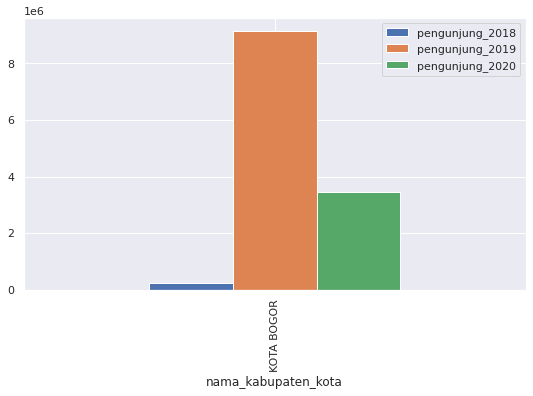

In [ ]:
kotabogor=tahun3[tahun3['nama_kabupaten_kota']=='KOTA BOGOR']
kotabogor.plot.bar(x='nama_kabupaten_kota',y=['pengunjung_2018','pengunjung_2019','pengunjung_2020'])

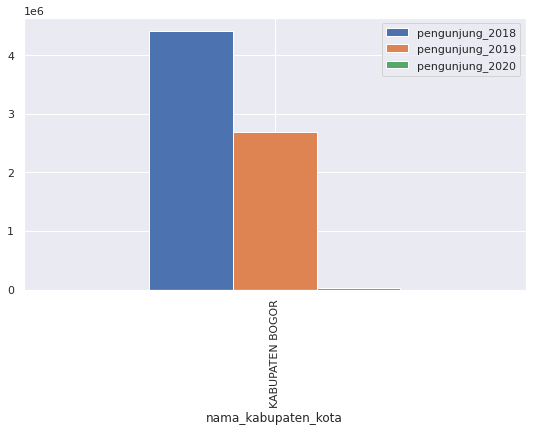

In [ ]:
kabbogor=tahun3[tahun3['nama_kabupaten_kota']=='KABUPATEN BOGOR']
kabbogor.plot.bar(x='nama_kabupaten_kota',y=['pengunjung_2018','pengunjung_2019','pengunjung_2020'])

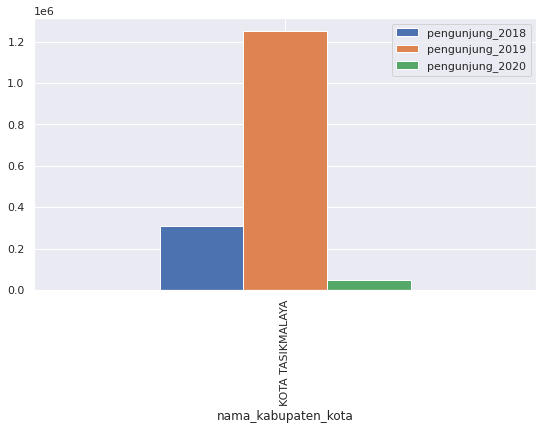

In [ ]:
tasik=tahun3[tahun3['nama_kabupaten_kota']=='KOTA TASIKMALAYA']
tasik.plot.bar(x='nama_kabupaten_kota',y=['pengunjung_2018','pengunjung_2019','pengunjung_2020'])

In [ ]:
jenis=dfrek20.groupby(['jenis_wisatawan']).sum()[['jumlah_pengunjung']].reset_index()
jenis

,jenis_wisatawan,jumlah_pengunjung
0,MANCANEGARA,1905213
1,NUSANTARA,36524515


Text(0.5, 1.0, 'Pengunjung Nusantara dan Mancanegara 2020')

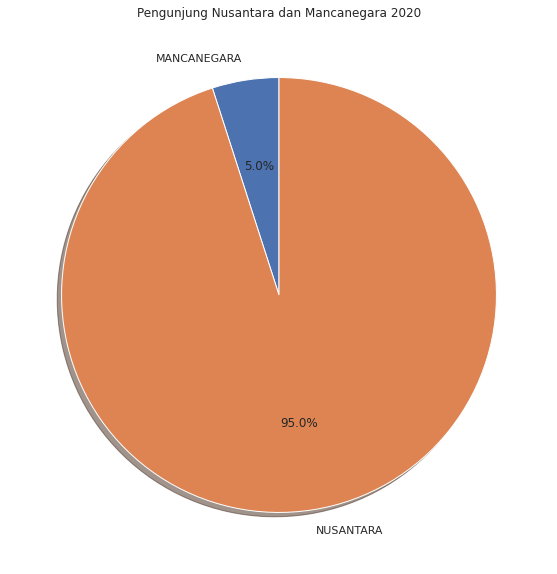

In [ ]:
plt.figure(figsize=[15,10])
plt.pie(jenis['jumlah_pengunjung'],labels=jenis['jenis_wisatawan'],autopct='%1.1f%%',
        shadow=True, startangle=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
        
plt.title('Pengunjung Nusantara dan Mancanegara 2020')

In [ ]:
#upper the column value so we can merge the data
cov2020g['nama_kab_kota']=cov2020g['nama_kab_kota'].str.upper()

In [ ]:
#group by kabupaten kota
df_faskes_19=faskes2.groupby(['nama_kabupaten_kota']).sum()[['jumlah_faskes']]
df_faskes_19=df_faskes_19.sort_values('jumlah_faskes',ascending=False).reset_index()
df_faskes_19.head(5)
# df_faskes_19.shape
# df_faskes_19h.plot.bar(x='nama_kabupaten_kota',y='jumlah_faskes_2019')
# plt.xticks(rotation=30, ha='right')

,nama_kabupaten_kota,jumlah_faskes
0,KABUPATEN BOGOR,4998
1,KABUPATEN BANDUNG,4420
2,KABUPATEN GARUT,4145
3,KABUPATEN SUKABUMI,3590
4,KABUPATEN CIANJUR,2958


In [ ]:
#group by kabupaten kota
df_faskes_18=faskes2.groupby(['nama_kabupaten_kota']).sum()[['jumlah_faskes']]
df_faskes_18=df_faskes_18.sort_values('jumlah_faskes',ascending=False).reset_index()
df_faskes_18.head(5)
# df_faskes_19.shape
# df_faskes_19h.plot.bar(x='nama_kabupaten_kota',y='jumlah_faskes_2019')
# plt.xticks(rotation=30, ha='right')

,nama_kabupaten_kota,jumlah_faskes
0,KABUPATEN BOGOR,4998
1,KABUPATEN BANDUNG,4420
2,KABUPATEN GARUT,4145
3,KABUPATEN SUKABUMI,3590
4,KABUPATEN CIANJUR,2958


## Merging Data 2019-2018 (Before Covid-19)

In [ ]:
#merge data
newdf2019 = pd.merge(dfk, df_faskes_18, how='left', left_on=['nama_kabupaten_kota'], right_on = ['nama_kabupaten_kota'])
# newdf2019=newdf2019.drop(columns=['kota_kab_belum_teridentifikasi','sembuh_unidentified','meninggal_unidentified','tahun','nama_kabupaten_kota','id','konfirmasi_total_daily_growth', 'konfirmasi_sembuh_daily_growth',
#        'konfirmasi_meninggal_daily_growth', 'konfirmasi_aktif_daily_growth','kode_kab_kota'])

In [ ]:
newdf2019.shape

(27, 3)

In [ ]:
newdf2019.head()

,nama_kabupaten_kota,pengunjung_2019,jumlah_faskes
0,KOTA BANDUNG,10853314,2045
1,KABUPATEN KARAWANG,10080168,2354
2,KOTA BOGOR,9160884,1053
3,KABUPATEN BANDUNG BARAT,5517072,2392
4,KABUPATEN CIANJUR,4900805,2958


In [ ]:
#merge data
newdf2018 = pd.merge(dfl, df_faskes_18, how='left', left_on=['nama_kabupaten_kota'], right_on = ['nama_kabupaten_kota'])
# newdf2019=newdf2019.drop(columns=['kota_kab_belum_teridentifikasi','sembuh_unidentified','meninggal_unidentified','tahun','nama_kabupaten_kota','id','konfirmasi_total_daily_growth', 'konfirmasi_sembuh_daily_growth',
#        'konfirmasi_meninggal_daily_growth', 'konfirmasi_aktif_daily_growth','kode_kab_kota'])

In [ ]:
newdf2018.shape

(27, 3)

In [ ]:
newdf2018.head()

,nama_kabupaten_kota,pengunjung_2018,jumlah_faskes
0,KABUPATEN BANDUNG BARAT,13823714,2392
1,KOTA BANDUNG,10472498,2045
2,KABUPATEN CIANJUR,9592520,2958
3,KABUPATEN KARAWANG,6707383,2354
4,KABUPATEN SUBANG,6284423,1875


## Merging Data 2020 (COVID-19)

In [ ]:
#merge data
newdf = pd.merge(cov2020g, dfj,  how='left', left_on=['nama_kab_kota'], right_on = ['nama_kabupaten_kota'])
newdf=newdf.drop(columns=['kota_kab_belum_teridentifikasi','sembuh_unidentified','meninggal_unidentified','tahun','nama_kabupaten_kota','id','konfirmasi_total_daily_growth', 'konfirmasi_sembuh_daily_growth',
       'konfirmasi_meninggal_daily_growth', 'konfirmasi_aktif_daily_growth','kode_kab_kota'])

In [ ]:
kota_bandung=newdf[newdf['nama_kab_kota']=='KOTA BANDUNG']
kab_bandung=newdf[newdf['nama_kab_kota']=='KABUPATEN BANDUNG']
kota_bogor=newdf[newdf['nama_kab_kota']=='KOTA BOGOR']
kabupaten_bogor=newdf[newdf['nama_kab_kota']=='KABUPATEN BOGOR']
kota_sb=newdf[newdf['nama_kab_kota']=='KOTA SUKABUMI']

In [ ]:
#view data
newdf.head()

,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,pengunjung_2020
0,KABUPATEN BANDUNG,207878.0,146836.0,3174.0,57868.0,4113427
1,KABUPATEN BANDUNG BARAT,73887.0,51900.0,1222.0,20765.0,1420031
2,KABUPATEN BEKASI,579511.0,420107.0,9182.0,150222.0,1826774
3,KABUPATEN BOGOR,374481.0,285074.0,3031.0,86376.0,28376
4,KABUPATEN CIAMIS,28869.0,19852.0,650.0,8367.0,651779


In [ ]:
faskes3=faskes[faskes['tahun']==2018].groupby(['nama_kabupaten_kota']).sum()
yaya=faskes[faskes['tahun']==2018]

In [ ]:
# yaya.duplicated().sum()

In [ ]:
newdf2 = pd.merge(newdf, faskes3,  how='left', left_on=['nama_kab_kota'], right_on = ['nama_kabupaten_kota'])
newdf2=newdf2.drop(columns=['id','kode_provinsi', 'kode_kabupaten_kota','tahun'])

In [ ]:
# newdf2=pd.concat([newdf2, data], axis = 1)

In [ ]:
newdf2['positive_rate']=newdf2['konfirmasi_aktif']/data['jumlah_penduduk']
newdf2['death_rate']=newdf2['konfirmasi_meninggal']/data['jumlah_penduduk']
newdf2['cure_rate']=newdf2['konfirmasi_sembuh']/data['jumlah_penduduk']

In [ ]:
newdf2.head()

,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,pengunjung_2020,jumlah_faskes,positive_rate,death_rate,cure_rate
0,KABUPATEN BANDUNG,207878.0,146836.0,3174.0,57868.0,4113427,4420,0.015969,0.000876,0.040520
1,KABUPATEN BANDUNG BARAT,73887.0,51900.0,1222.0,20765.0,1420031,2392,0.011611,0.000683,0.029021
2,KABUPATEN BEKASI,579511.0,420107.0,9182.0,150222.0,1826774,2735,0.048256,0.002950,0.134952
3,KABUPATEN BOGOR,374481.0,285074.0,3031.0,86376.0,28376,4998,0.015916,0.000558,0.052528
4,KABUPATEN CIAMIS,28869.0,19852.0,650.0,8367.0,651779,1669,0.006808,0.000529,0.016152


## Exploration of data covid 2

In [ ]:
name_set = ['KOTA BANDUNG', 'KABUPATEN BANDUNG', 'KOTA BOGOR', 'KABUPATEN BOGOR', 'KOTA SUKABUMI']
newdf2p= newdf2.loc[newdf2['nama_kab_kota'].isin(name_set)]

In [ ]:
newdf2p

,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,pengunjung_2020,jumlah_faskes,positive_rate,death_rate,cure_rate
0,KABUPATEN BANDUNG,207878.0,146836.0,3174.0,57868.0,4113427,4420,0.015969,0.000876,0.040520
3,KABUPATEN BOGOR,374481.0,285074.0,3031.0,86376.0,28376,4998,0.015916,0.000558,0.052528
18,KOTA BANDUNG,431441.0,309929.0,12554.0,108958.0,9730878,2045,0.044579,0.005136,0.126804
21,KOTA BOGOR,280812.0,204913.0,7739.0,68160.0,3457722,1053,0.065346,0.007419,0.196452
25,KOTA SUKABUMI,59615.0,43308.0,797.0,15510.0,107557,467,0.044784,0.002301,0.125048


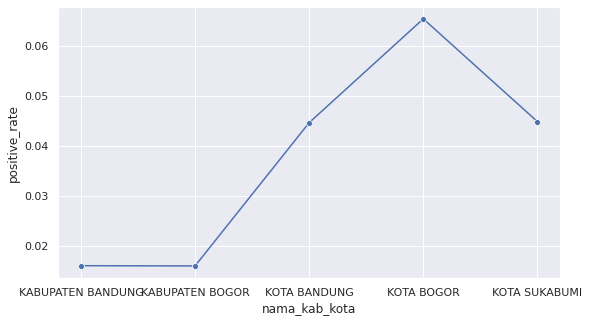

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.lineplot(x='nama_kab_kota', y='positive_rate', data=newdf2p, marker="o")

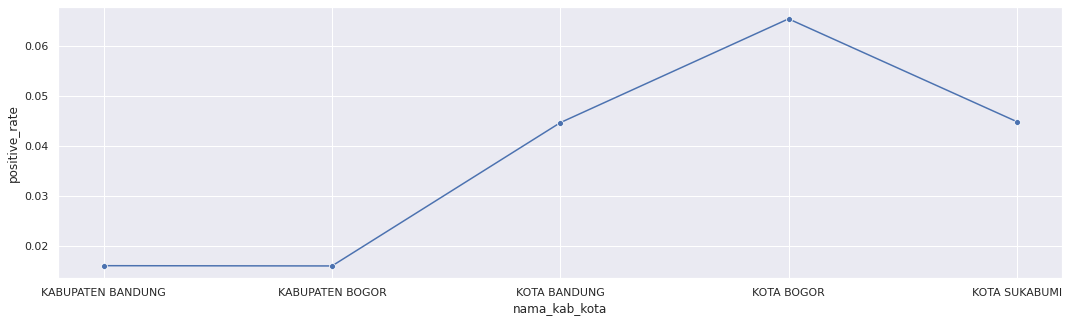

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.lineplot(x='nama_kab_kota', y='positive_rate', data=newdf2p, marker ='o')

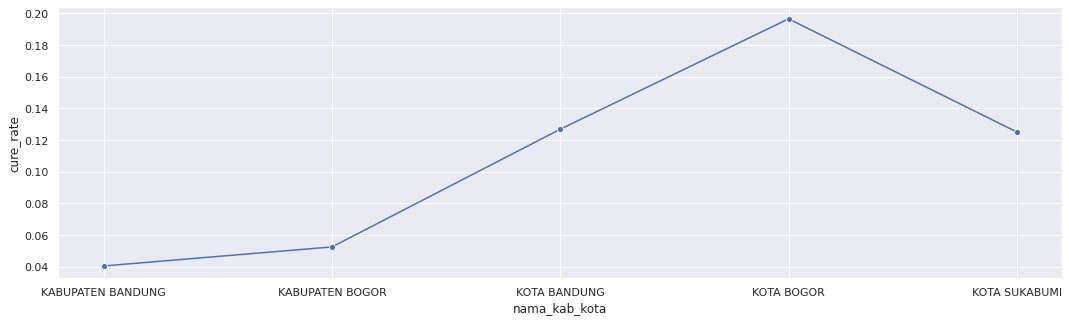

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(18,5)})
ax= sns.lineplot(x='nama_kab_kota', y='cure_rate', data=newdf2p, marker = 'o')

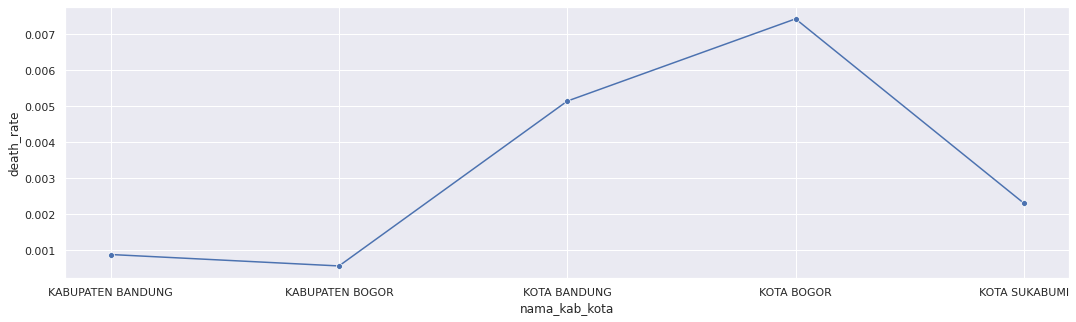

In [ ]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(18,5)})
ax= sns.lineplot(x='nama_kab_kota', y='death_rate', data=newdf2p, marker='o')

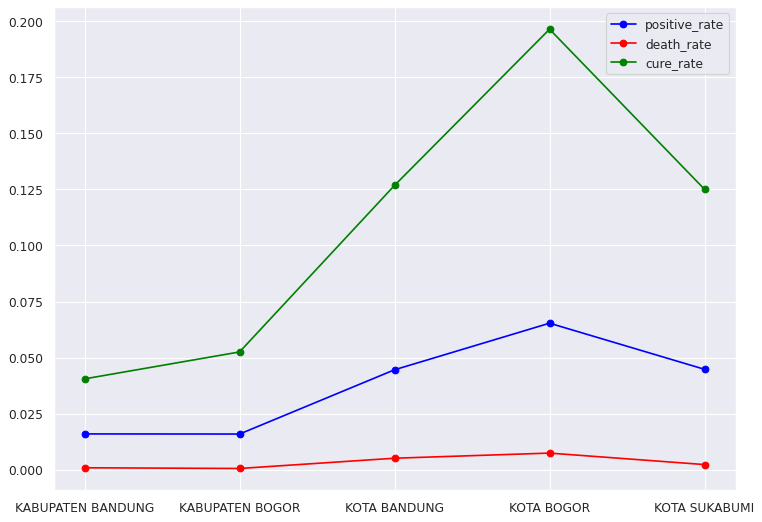

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(11, 8), dpi=80)
plt.plot( 'nama_kab_kota', 'positive_rate', data=newdf2p, marker='o', color='blue')
plt.plot( 'nama_kab_kota', 'death_rate', data=newdf2p, marker='o', color='red')
plt.plot( 'nama_kab_kota', 'cure_rate', data=newdf2p, marker='o', color='green')

# show legend
plt.legend()

# show graph
plt.show()

In [ ]:
#grup by kabupaten kota
df_pr=newdf2.groupby(['nama_kab_kota']).sum()[['positive_rate']]
df_pr=df_pr.sort_values('positive_rate',ascending=False).reset_index()
df_pr=df_pr.head(5)

<Figure size 720x576 with 0 Axes>

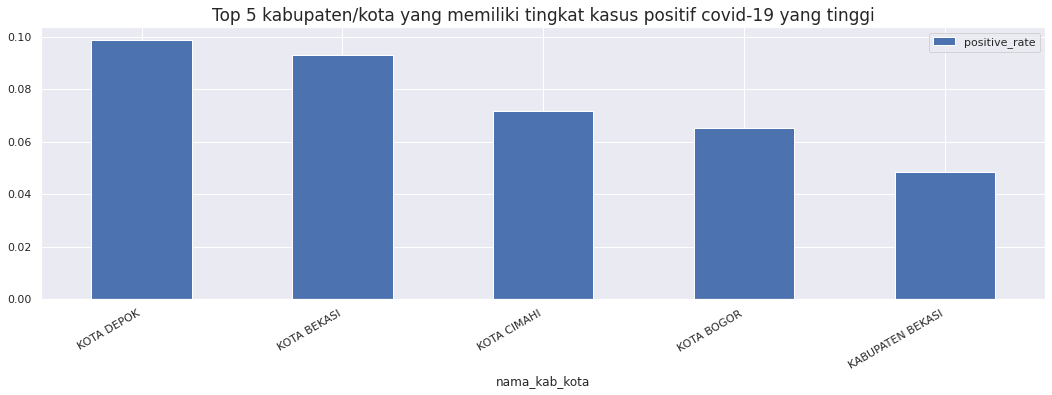

In [ ]:
plt.figure(figsize=(10,8)) 
df_pr.plot.bar(x='nama_kab_kota',y='positive_rate')
plt.xticks(rotation=30, ha='right')
plt.title('Top 5 kabupaten/kota yang memiliki tingkat kasus positif covid-19 yang tinggi', fontsize=17)
plt.show()

*   Top 5 Kota/kabupaten yang memiliki tingkat kasus positif paling tinggi


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

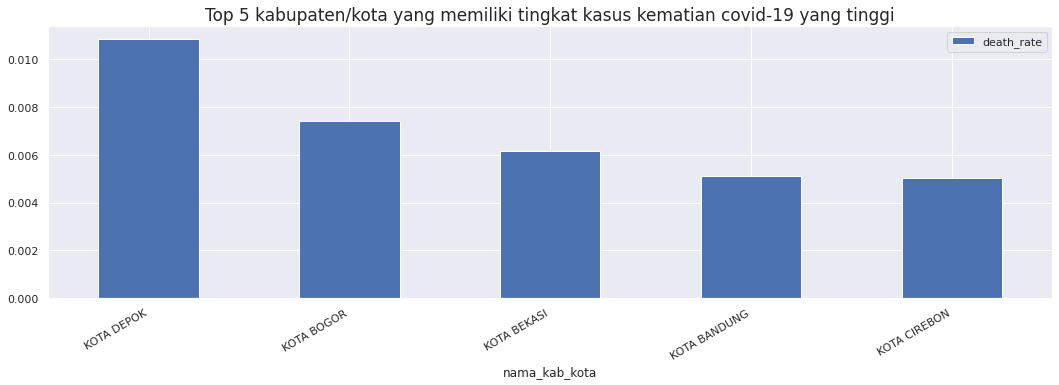

In [ ]:
#grup by kabupaten kota
df_dr=newdf2.groupby(['nama_kab_kota']).sum()[['death_rate']]
df_dr=df_dr.sort_values('death_rate',ascending=False).reset_index()
df_dr=df_dr.head(5)
df_dr.plot.bar(x='nama_kab_kota',y='death_rate')
plt.title('Top 5 kabupaten/kota yang memiliki tingkat kasus kematian covid-19 yang tinggi',fontsize=17)
plt.xticks(rotation=30, ha='right')

*   Top 5 Kota/kabupaten yang memiliki tingkat kasus kematian akibat covid-19 paling tinggi


# Modelling for Data 2020 (COVID)

## Checking Outlier for data 2020 (COVID-19)

In [ ]:
#took numericaldata type
nums2=newdf2.select_dtypes(include=['int64','float64'])

#see outliers for numerical data
for k, v in nums2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nums2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column konfirmasi_total outliers = 11.11%
Column konfirmasi_sembuh outliers = 11.11%
Column konfirmasi_meninggal outliers = 11.11%
Column konfirmasi_aktif outliers = 11.11%
Column pengunjung_2020 outliers = 11.11%
Column jumlah_faskes outliers = 3.70%
Column positive_rate outliers = 7.41%
Column death_rate outliers = 7.41%
Column cure_rate outliers = 7.41%


In [ ]:
# Remove outlier outside 1,5 IQR for train data (x)

cols=newdf2.select_dtypes(include=['int64','float64']).columns
print(f'Jumlah baris sebelum memfilter outlier: {len(newdf2)}')

filtered_entries = np.array([True] * len(newdf2))
for col in range(len(cols)):
    Q1 = newdf2[cols[col]].quantile(0.25)
    Q3 = newdf2[cols[col]].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((newdf2[cols[col]] >= low_limit) & (newdf2[cols[col]] <= high_limit)) & filtered_entries
    
dfo = newdf2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo)}')

Jumlah baris sebelum memfilter outlier: 27
Jumlah baris setelah memfilter outlier: 19


*   Dengan menimbang sedikitnya entry data yang ada pada data set maka data tidak dihilangkan dari outliernya




## Minmax Scaller 

In [ ]:
#define nums cats pipeline
minmax = Pipeline([('std_scaler', MinMaxScaler())])

In [ ]:
dfon=minmax.fit_transform(newdf2.select_dtypes(include=['int64','float64']))

## Choosing Method Clustering 2020

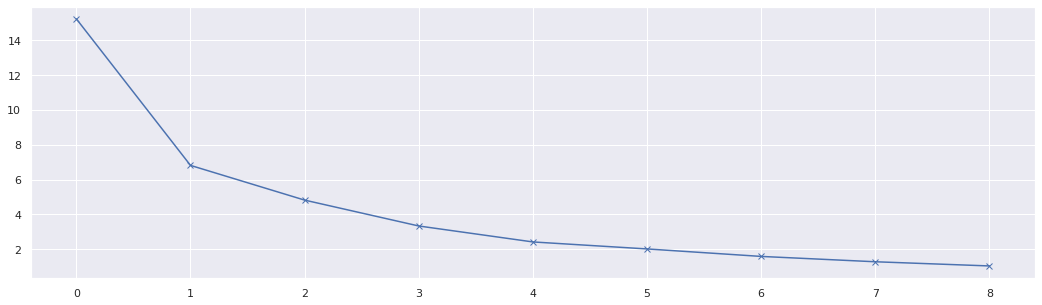

In [ ]:
#finding best K
n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmeans=KMeans(i)
    kmeans.fit(dfon)
    cost.append(kmeans.inertia_)  

y_pred = kmeans.fit_predict(dfon)

#view best K
plt.plot(cost,'bx-')


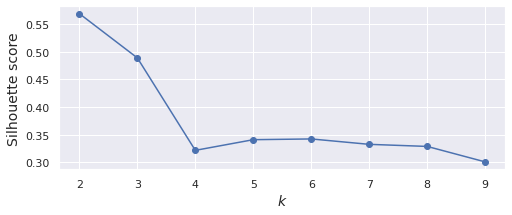

In [ ]:
silhouette_score(dfon, kmeans.labels_)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(dfon) for k in range(1, 10)]

silhouette_scores = [silhouette_score(dfon, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
range_val = range(2,15)
silhouette = []

for i in range_val:
    ag = AgglomerativeClustering(n_clusters=i)
    ag.fit(dfon)
    sscore = silhouette_score(dfon, ag.labels_)
    silhouette.append(sscore)

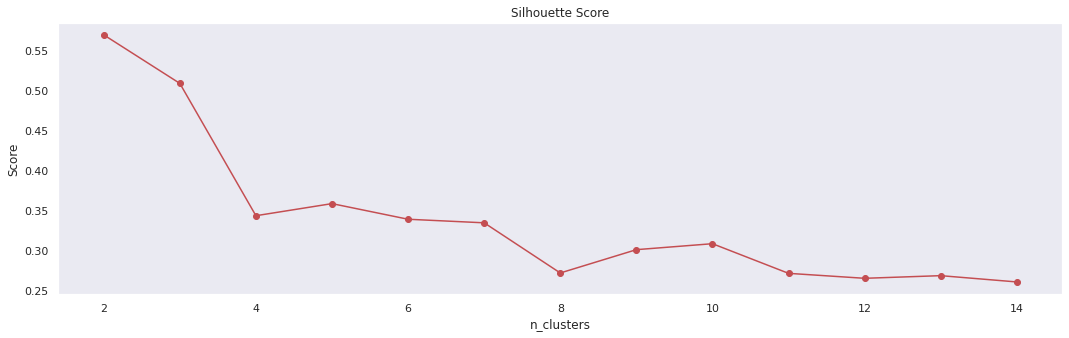

In [ ]:
plt.plot(range_val,silhouette,'ro-')
plt.xlabel('n_clusters')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.grid()

plt.show()

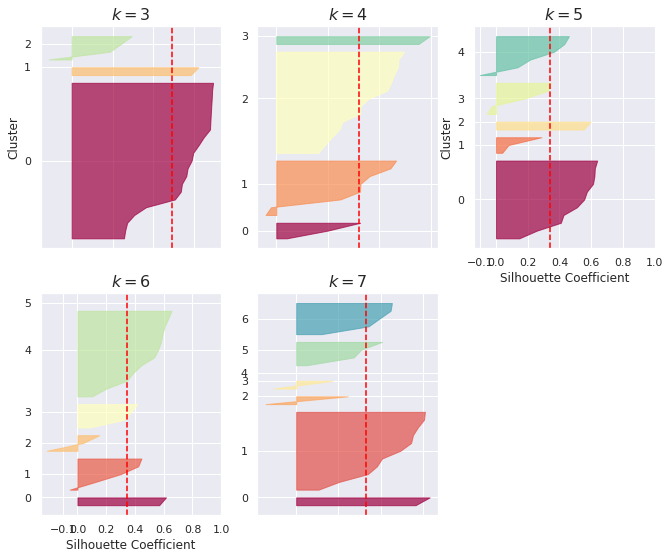

In [ ]:
plt.figure(figsize=(11, 9))

for k in (3,4,5,6,7):
    plt.subplot(2, 3, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(dfon, y_pred)

    padding = len(dfon) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [ ]:
sscore_ag = silhouette_score(dfon,ag.labels_)
sscore_km = silhouette_score(dfon,kmeans.labels_)
print(f"SScore Ag: {sscore_ag}, SScore Kmeans: {sscore_km}")

SScore Ag: 0.26025208194753974, SScore Kmeans: 0.3401842892587368


* Metode yang kami pakai sesuai dengan score yang telah dihitung 
adalah **K-Means**

### Model Data 2020

#### K-2 Clustering (Sesuai dengan nilai silhouette score)

In [ ]:
kmeans=KMeans(n_clusters=2,random_state=78)
kmeans.fit(dfon)
labels=kmeans.labels_

In [ ]:
kmeans.predict(dfon)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0], dtype=int32)

In [ ]:
clusters2_2020=pd.concat([newdf2, pd.DataFrame({'cluster':labels})], axis=1)
clusters2_2020=clusters2_2020.dropna()

In [ ]:
clusters2_2020

,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,pengunjung_2020,jumlah_faskes,positive_rate,death_rate,cure_rate,cluster
0,KABUPATEN BANDUNG,207878.0,146836.0,3174.0,57868.0,4113427,4420,0.015969,0.000876,0.040520,0
1,KABUPATEN BANDUNG BARAT,73887.0,51900.0,1222.0,20765.0,1420031,2392,0.011611,0.000683,0.029021,0
2,KABUPATEN BEKASI,579511.0,420107.0,9182.0,150222.0,1826774,2735,0.048256,0.002950,0.134952,1
3,KABUPATEN BOGOR,374481.0,285074.0,3031.0,86376.0,28376,4998,0.015916,0.000558,0.052528,0
4,KABUPATEN CIAMIS,28869.0,19852.0,650.0,8367.0,651779,1669,0.006808,0.000529,0.016152,0
5,KABUPATEN CIANJUR,20063.0,15222.0,388.0,4453.0,1496808,2958,0.001797,0.000157,0.006144,0
6,KABUPATEN CIREBON,132045.0,94303.0,6517.0,31225.0,459379,2675,0.013752,0.002870,0.041532,0
7,KABUPATEN GARUT,100507.0,65026.0,2083.0,33398.0,1909892,4145,0.012917,0.000806,0.025149,0
8,KABUPATEN INDRAMAYU,46294.0,33682.0,1259.0,11353.0,230154,2369,0.006189,0.000686,0.018361,0
9,KABUPATEN KARAWANG,247762.0,164186.0,6537.0,77039.0,1737979,2354,0.031585,0.002680,0.067314,0


In [ ]:
clusters2_2020g = clusters2_2020.groupby('cluster')['nama_kab_kota'].agg(['unique'])

In [ ]:
clusters2_2020g.reset_index()

,cluster,unique
0,0,"[KABUPATEN BANDUNG, KABUPATEN BANDUNG BARAT, K..."
1,1,"[KABUPATEN BEKASI, KOTA BANDUNG, KOTA BEKASI, ..."


In [ ]:
clusters2_2020g['unique'].tolist()

[array(['KABUPATEN BANDUNG', 'KABUPATEN BANDUNG BARAT', 'KABUPATEN BOGOR',
        'KABUPATEN CIAMIS', 'KABUPATEN CIANJUR', 'KABUPATEN CIREBON',
        'KABUPATEN GARUT', 'KABUPATEN INDRAMAYU', 'KABUPATEN KARAWANG',
        'KABUPATEN KUNINGAN', 'KABUPATEN MAJALENGKA',
        'KABUPATEN PANGANDARAN', 'KABUPATEN PURWAKARTA',
        'KABUPATEN SUBANG', 'KABUPATEN SUKABUMI', 'KABUPATEN SUMEDANG',
        'KABUPATEN TASIKMALAYA', 'KOTA BANJAR', 'KOTA CIMAHI',
        'KOTA CIREBON', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA'], dtype=object),
 array(['KABUPATEN BEKASI', 'KOTA BANDUNG', 'KOTA BEKASI', 'KOTA BOGOR',
        'KOTA DEPOK'], dtype=object)]

##### Visualisasi Clustering 

###### Scatterplot

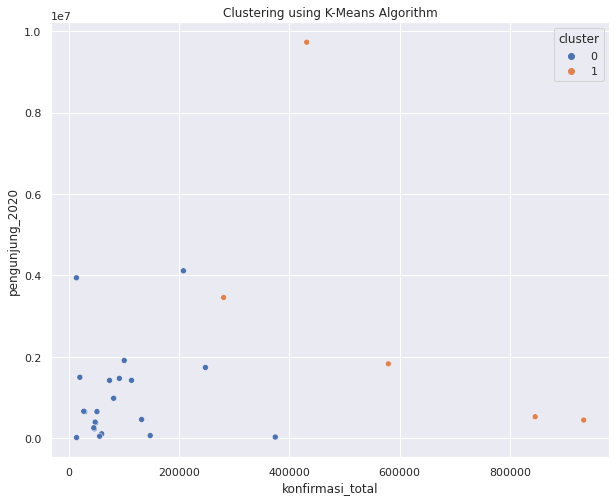

In [ ]:
plt.figure(figsize=(10,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "konfirmasi_total", y="pengunjung_2020", 
                   hue=clusters2_2020["cluster"])

# for i, txt in enumerate(clusters2_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters2_2020.konfirmasi_total.iat[i],clusters2_2020.pengunjung_2020.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

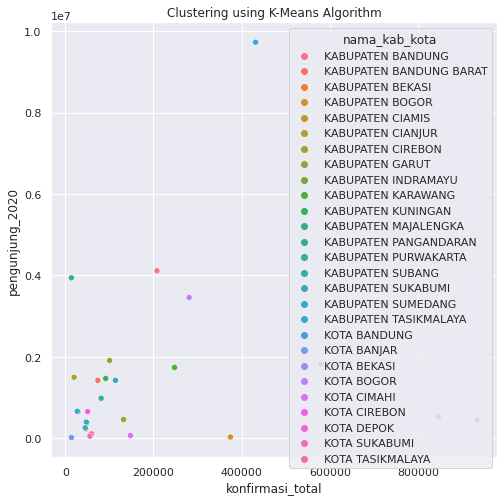

In [ ]:
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "konfirmasi_total", y="pengunjung_2020", hue=clusters2_2020["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

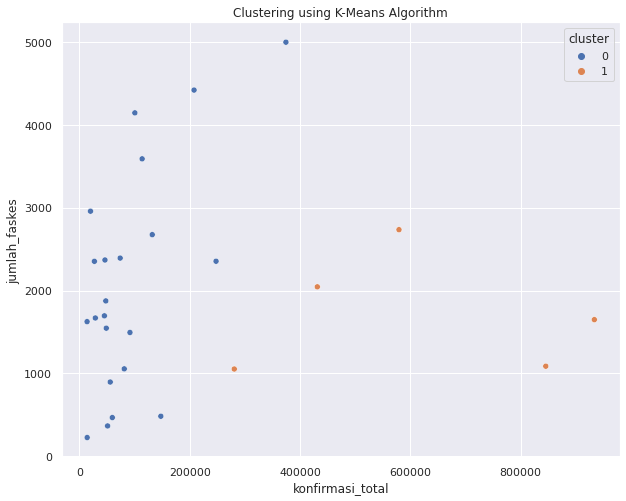

In [ ]:
plt.figure(figsize=(10,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "konfirmasi_total", y="jumlah_faskes", hue=clusters2_2020["cluster"])

# for i, txt in enumerate(clusters2_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters2_2020.konfirmasi_total.iat[i],clusters2_2020.jumlah_faskes.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

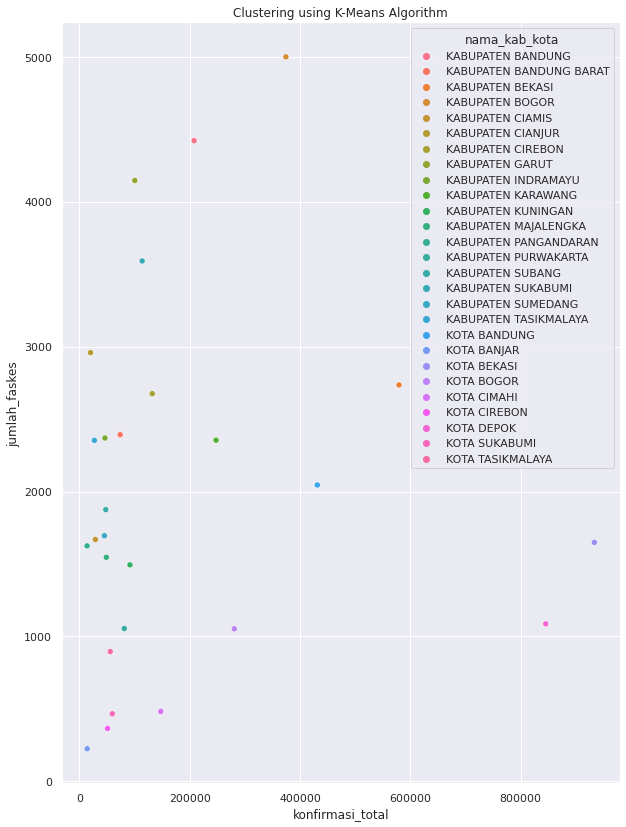

In [ ]:
plt.figure(figsize=(10,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "konfirmasi_total", y="jumlah_faskes", hue=clusters2_2020["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

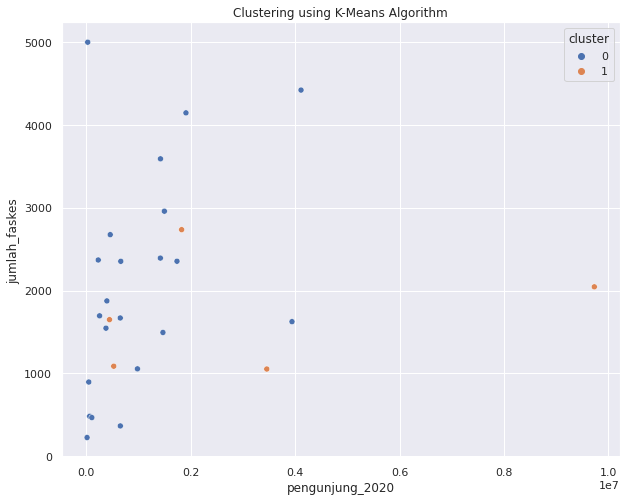

In [ ]:
plt.figure(figsize=(10,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "pengunjung_2020", y="jumlah_faskes", hue=clusters2_2020["cluster"])

# for i, txt in enumerate(clusters2_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters2_2020.pengunjung_2020.iat[i],clusters2_2020.jumlah_faskes.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

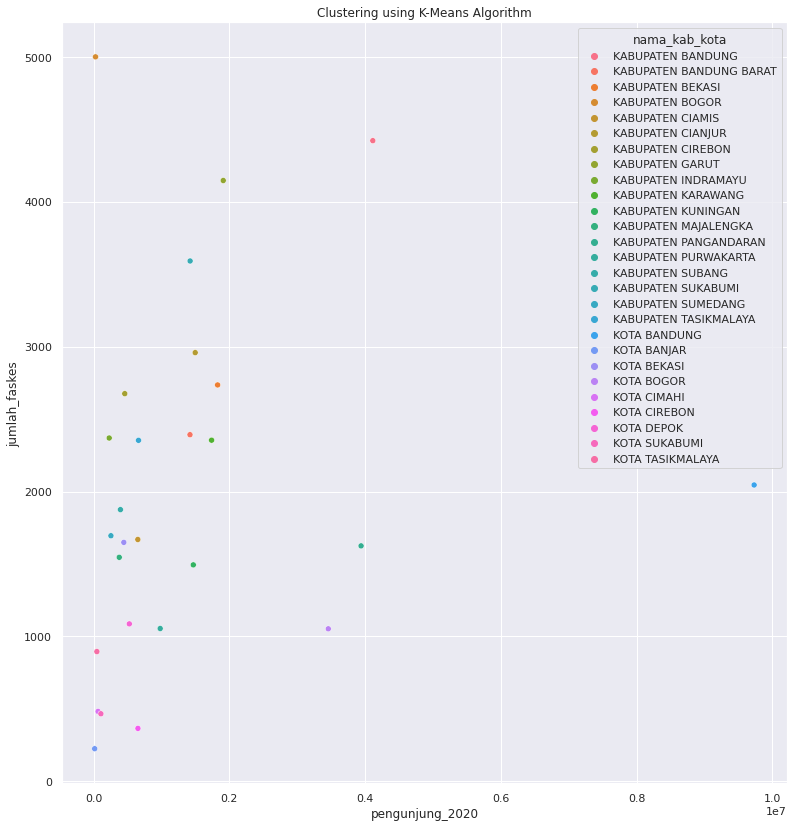

In [ ]:
plt.figure(figsize=(13,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "pengunjung_2020", y="jumlah_faskes", hue=clusters2_2020["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

Positive Rate 

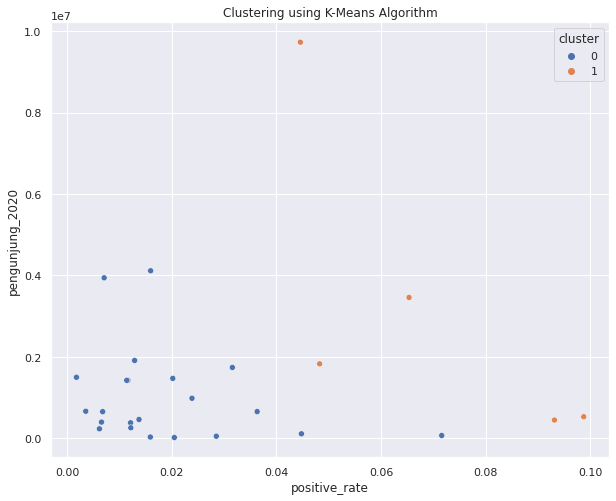

In [ ]:
plt.figure(figsize=(10,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "positive_rate", y="pengunjung_2020", 
                   hue=clusters2_2020["cluster"])

# for i, txt in enumerate(clusters2_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters2_2020.konfirmasi_total.iat[i],clusters2_2020.pengunjung_2020.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

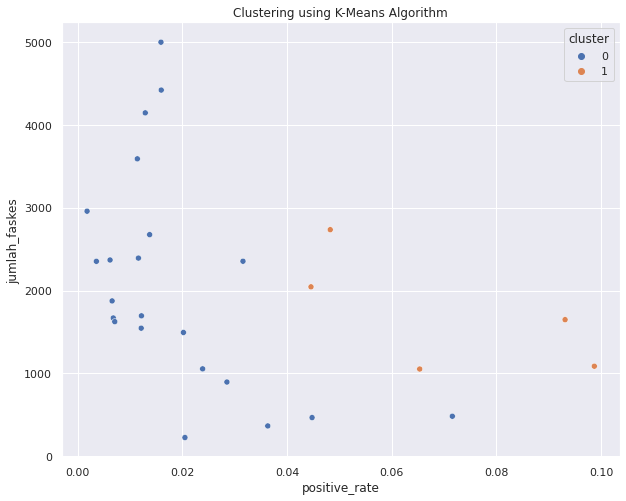

In [ ]:
plt.figure(figsize=(10,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2020, x= "positive_rate", y="jumlah_faskes", hue=clusters2_2020["cluster"])

# for i, txt in enumerate(clusters2_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters2_2020.konfirmasi_total.iat[i],clusters2_2020.jumlah_faskes.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

###### Boxplot

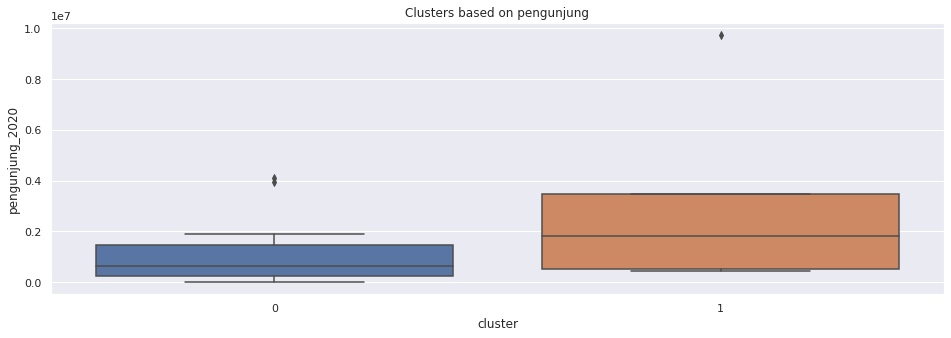

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='pengunjung_2020', showfliers=True)
plt.show()

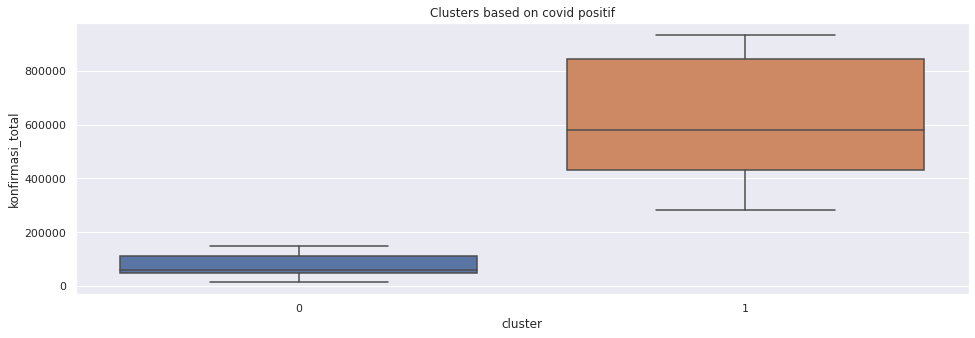

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='konfirmasi_total', showfliers=False)
plt.show()

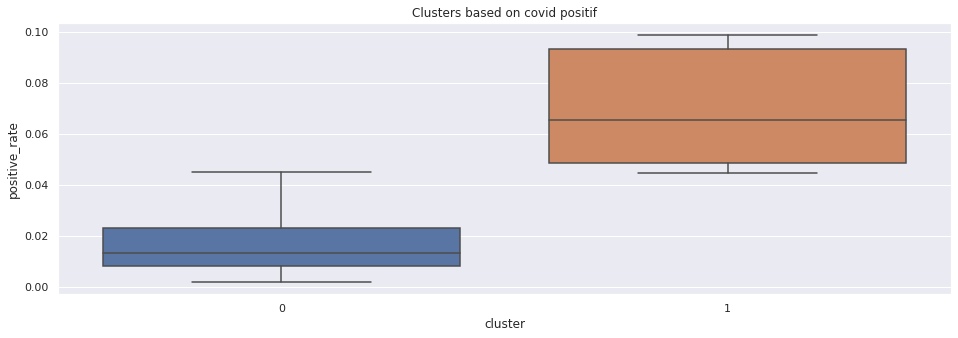

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='positive_rate', showfliers=False)
plt.show()

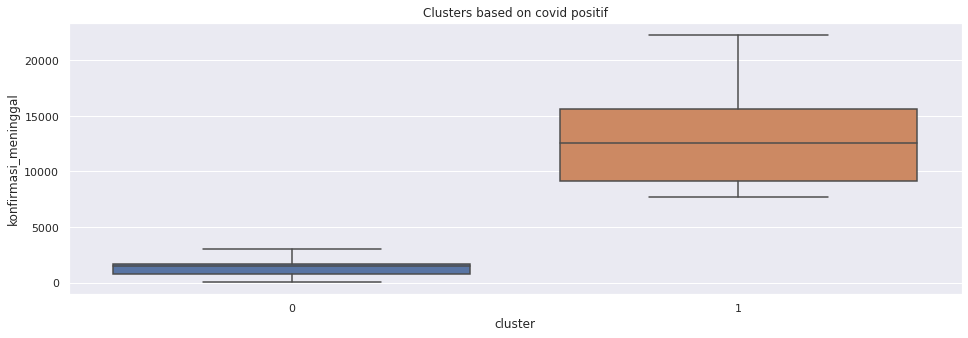

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='konfirmasi_meninggal', showfliers=False)
plt.show()

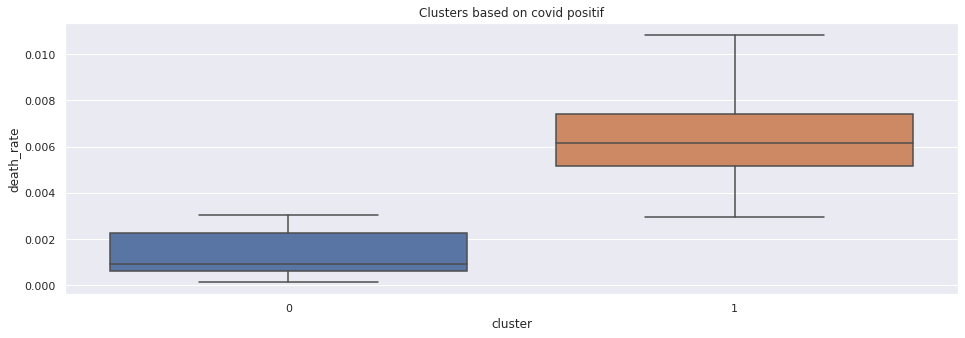

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='death_rate', showfliers=False)
plt.show()

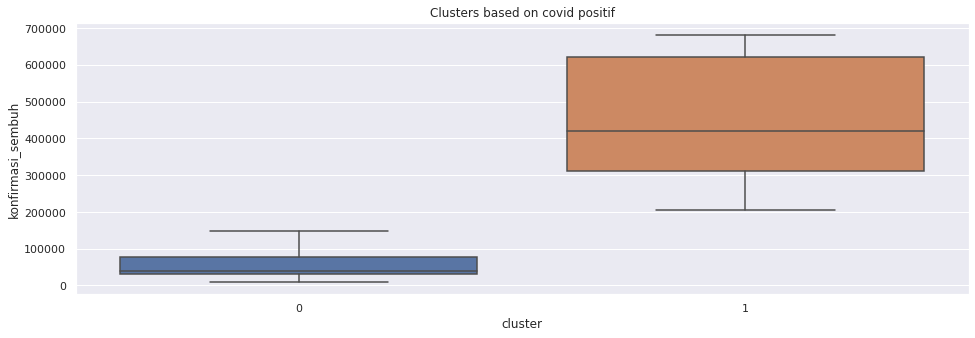

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='konfirmasi_sembuh', showfliers=False)
plt.show()

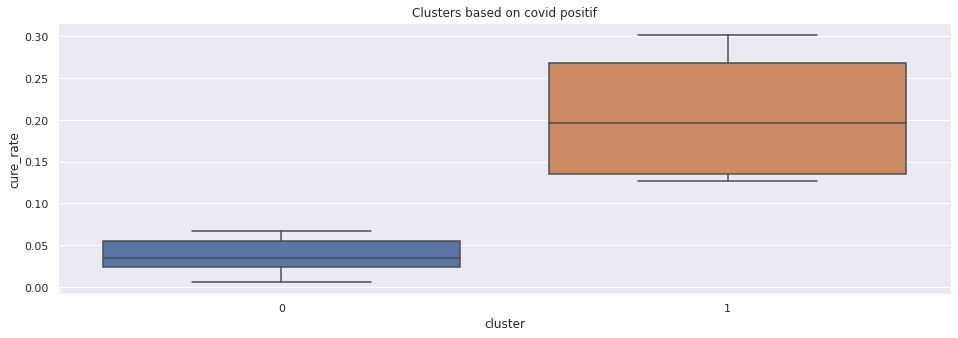

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='cure_rate', showfliers=False)
plt.show()

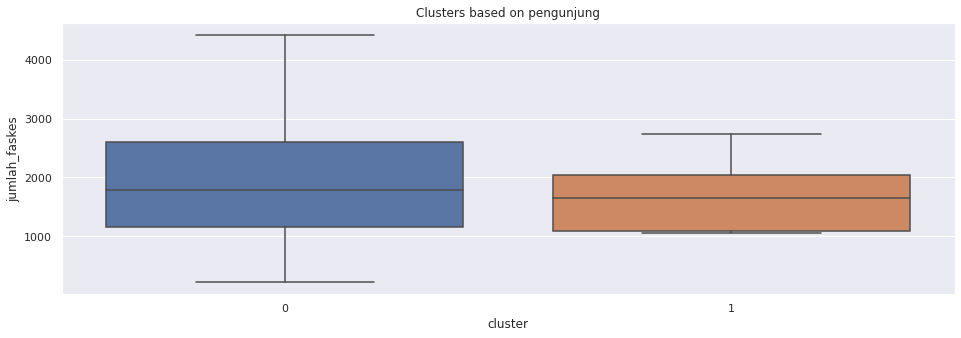

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters2_2020, x='cluster', y='jumlah_faskes', showfliers=False)
plt.show()

In [ ]:
clusters2_2020

,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,pengunjung_2020,jumlah_faskes,positive_rate,death_rate,cure_rate,cluster
0,KABUPATEN BANDUNG,207878.0,146836.0,3174.0,57868.0,4113427,4420,0.015969,0.000876,0.040520,0
1,KABUPATEN BANDUNG BARAT,73887.0,51900.0,1222.0,20765.0,1420031,2392,0.011611,0.000683,0.029021,0
2,KABUPATEN BEKASI,579511.0,420107.0,9182.0,150222.0,1826774,2735,0.048256,0.002950,0.134952,1
3,KABUPATEN BOGOR,374481.0,285074.0,3031.0,86376.0,28376,4998,0.015916,0.000558,0.052528,0
4,KABUPATEN CIAMIS,28869.0,19852.0,650.0,8367.0,651779,1669,0.006808,0.000529,0.016152,0
5,KABUPATEN CIANJUR,20063.0,15222.0,388.0,4453.0,1496808,2958,0.001797,0.000157,0.006144,0
6,KABUPATEN CIREBON,132045.0,94303.0,6517.0,31225.0,459379,2675,0.013752,0.002870,0.041532,0
7,KABUPATEN GARUT,100507.0,65026.0,2083.0,33398.0,1909892,4145,0.012917,0.000806,0.025149,0
8,KABUPATEN INDRAMAYU,46294.0,33682.0,1259.0,11353.0,230154,2369,0.006189,0.000686,0.018361,0
9,KABUPATEN KARAWANG,247762.0,164186.0,6537.0,77039.0,1737979,2354,0.031585,0.002680,0.067314,0


#### K-4 Clustering (Sesuai dengan hipotesa)

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=78)
kmeans.fit(dfon)
labels=kmeans.labels_

In [ ]:
kmeans.predict(dfon)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 2, 1,
       3, 3, 2, 3, 3], dtype=int32)

In [ ]:
clusters4_2020=pd.concat([newdf2, pd.DataFrame({'cluster':labels})], axis=1)
clusters4_2020=clusters4_2020.dropna()

In [ ]:
clusters4_2020

,nama_kab_kota,konfirmasi_total,konfirmasi_sembuh,konfirmasi_meninggal,konfirmasi_aktif,pengunjung_2020,jumlah_faskes,positive_rate,death_rate,cure_rate,cluster
0,KABUPATEN BANDUNG,207878.0,146836.0,3174.0,57868.0,4113427,4420,0.015969,0.000876,0.040520,0
1,KABUPATEN BANDUNG BARAT,73887.0,51900.0,1222.0,20765.0,1420031,2392,0.011611,0.000683,0.029021,0
2,KABUPATEN BEKASI,579511.0,420107.0,9182.0,150222.0,1826774,2735,0.048256,0.002950,0.134952,1
3,KABUPATEN BOGOR,374481.0,285074.0,3031.0,86376.0,28376,4998,0.015916,0.000558,0.052528,0
4,KABUPATEN CIAMIS,28869.0,19852.0,650.0,8367.0,651779,1669,0.006808,0.000529,0.016152,0
5,KABUPATEN CIANJUR,20063.0,15222.0,388.0,4453.0,1496808,2958,0.001797,0.000157,0.006144,0
6,KABUPATEN CIREBON,132045.0,94303.0,6517.0,31225.0,459379,2675,0.013752,0.002870,0.041532,0
7,KABUPATEN GARUT,100507.0,65026.0,2083.0,33398.0,1909892,4145,0.012917,0.000806,0.025149,0
8,KABUPATEN INDRAMAYU,46294.0,33682.0,1259.0,11353.0,230154,2369,0.006189,0.000686,0.018361,0
9,KABUPATEN KARAWANG,247762.0,164186.0,6537.0,77039.0,1737979,2354,0.031585,0.002680,0.067314,0


In [ ]:
clusters4_2020g = clusters4_2020.groupby('cluster')['nama_kab_kota'].agg(['unique'])

In [ ]:
clusters4_2020g.reset_index()

,cluster,unique
0,0,"[KABUPATEN BANDUNG, KABUPATEN BANDUNG BARAT, K..."
1,1,"[KABUPATEN BEKASI, KOTA BANDUNG, KOTA BOGOR]"
2,2,"[KOTA BEKASI, KOTA DEPOK]"
3,3,"[KABUPATEN PURWAKARTA, KOTA BANJAR, KOTA CIMAH..."


In [ ]:
clusters4_2020g['unique'].tolist()

[array(['KABUPATEN BANDUNG', 'KABUPATEN BANDUNG BARAT', 'KABUPATEN BOGOR',
        'KABUPATEN CIAMIS', 'KABUPATEN CIANJUR', 'KABUPATEN CIREBON',
        'KABUPATEN GARUT', 'KABUPATEN INDRAMAYU', 'KABUPATEN KARAWANG',
        'KABUPATEN KUNINGAN', 'KABUPATEN MAJALENGKA',
        'KABUPATEN PANGANDARAN', 'KABUPATEN SUBANG', 'KABUPATEN SUKABUMI',
        'KABUPATEN SUMEDANG', 'KABUPATEN TASIKMALAYA'], dtype=object),
 array(['KABUPATEN BEKASI', 'KOTA BANDUNG', 'KOTA BOGOR'], dtype=object),
 array(['KOTA BEKASI', 'KOTA DEPOK'], dtype=object),
 array(['KABUPATEN PURWAKARTA', 'KOTA BANJAR', 'KOTA CIMAHI',
        'KOTA CIREBON', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA'], dtype=object)]

##### Visualisasi Clustering 

###### Scatterplot

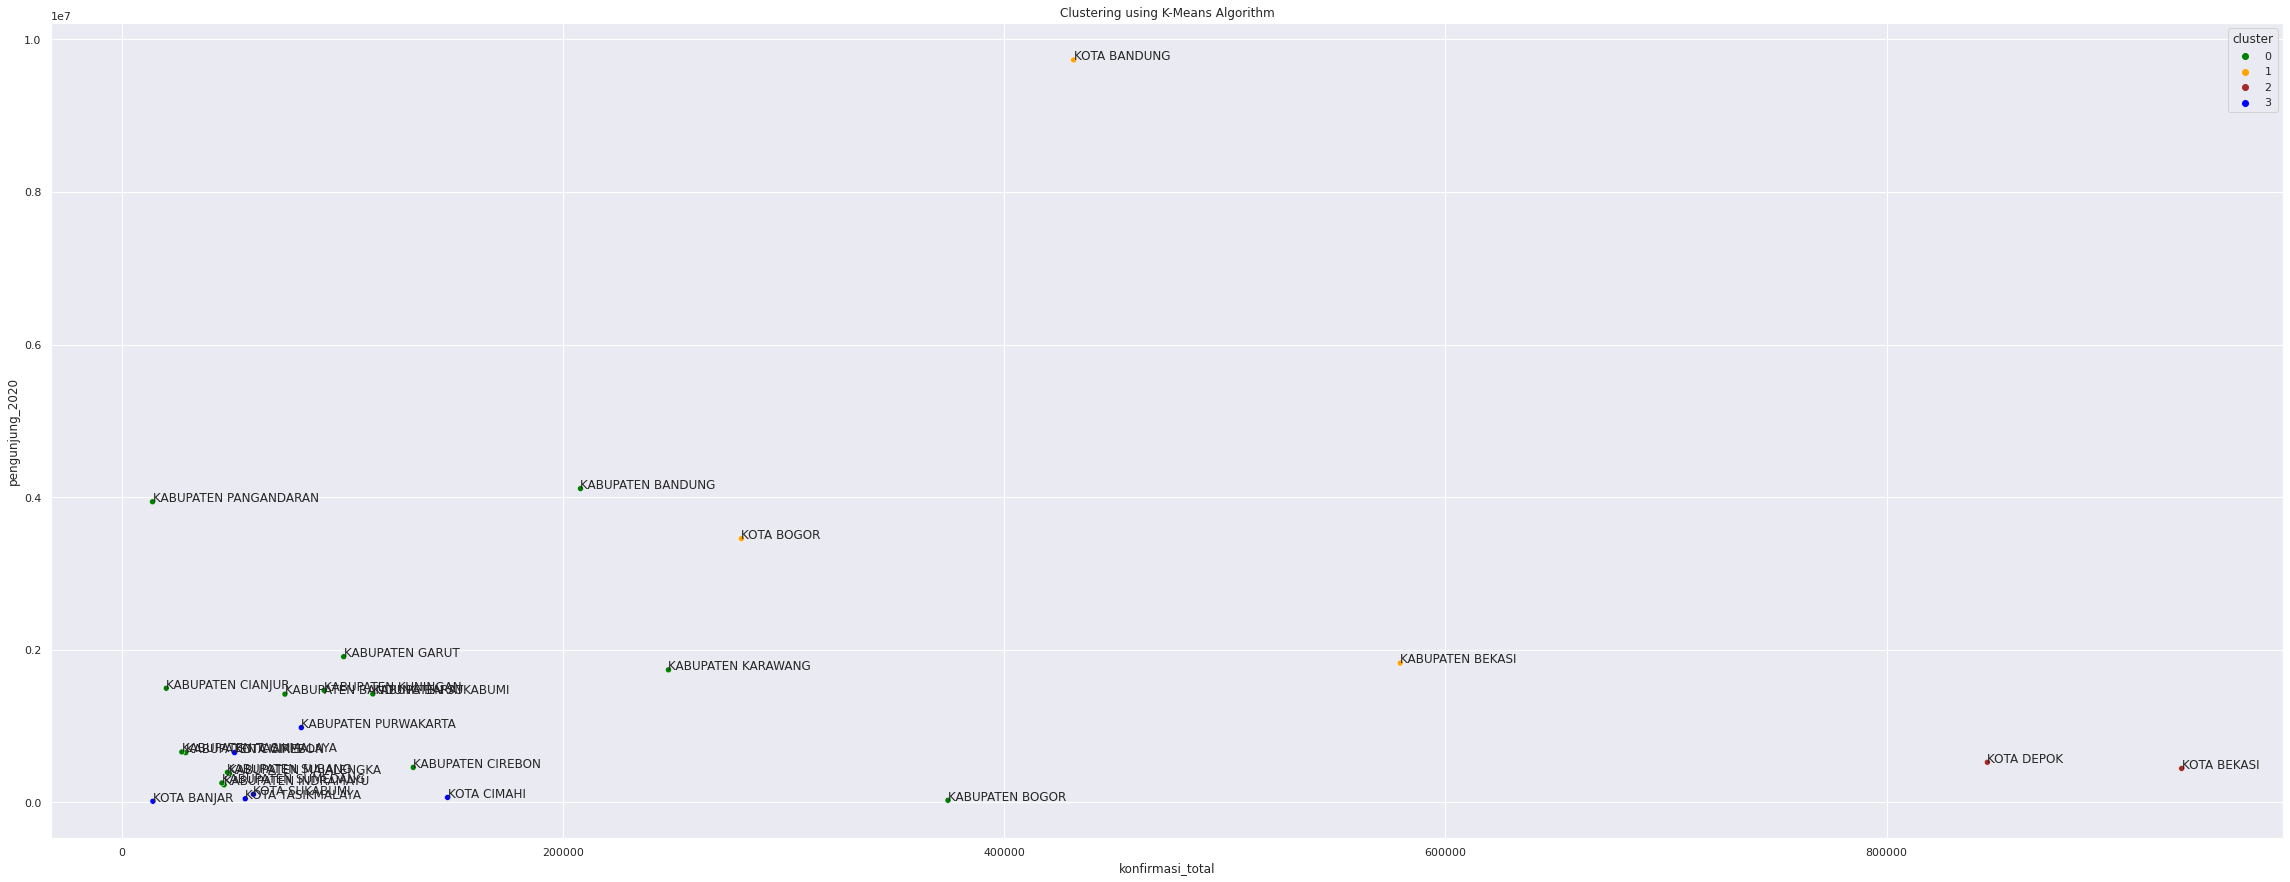

In [ ]:
plt.figure(figsize=(40,15))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x= "konfirmasi_total", y="pengunjung_2020", 
                   hue=clusters4_2020["cluster"], palette=['green','orange','brown','blue'])

# for i, txt in enumerate(clusters4_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters4_2020.konfirmasi_total.iat[i],clusters4_2020.pengunjung_2020.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

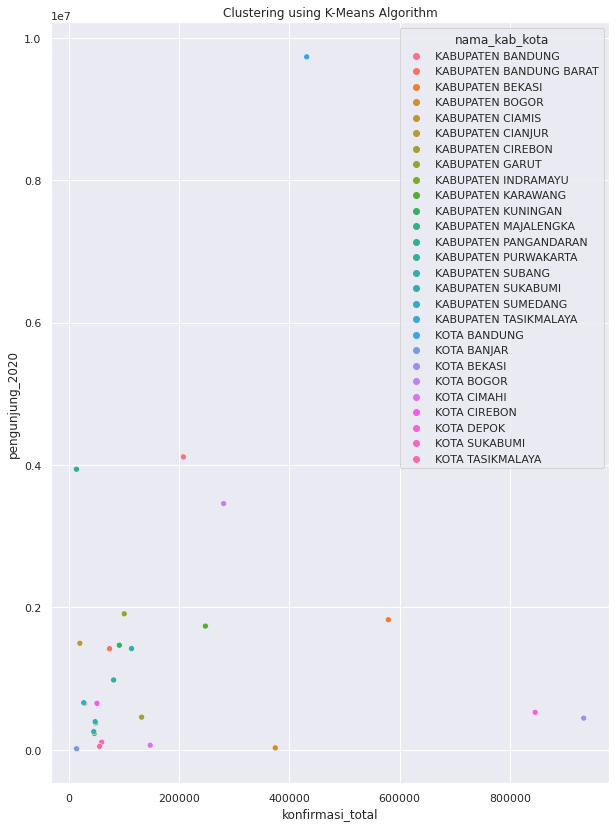

In [ ]:
plt.figure(figsize=(10,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x="konfirmasi_total", y="pengunjung_2020", 
                   hue=clusters4_2020["nama_kab_kota"])

plt.title("Clustering using K-Means Algorithm")
plt.show()

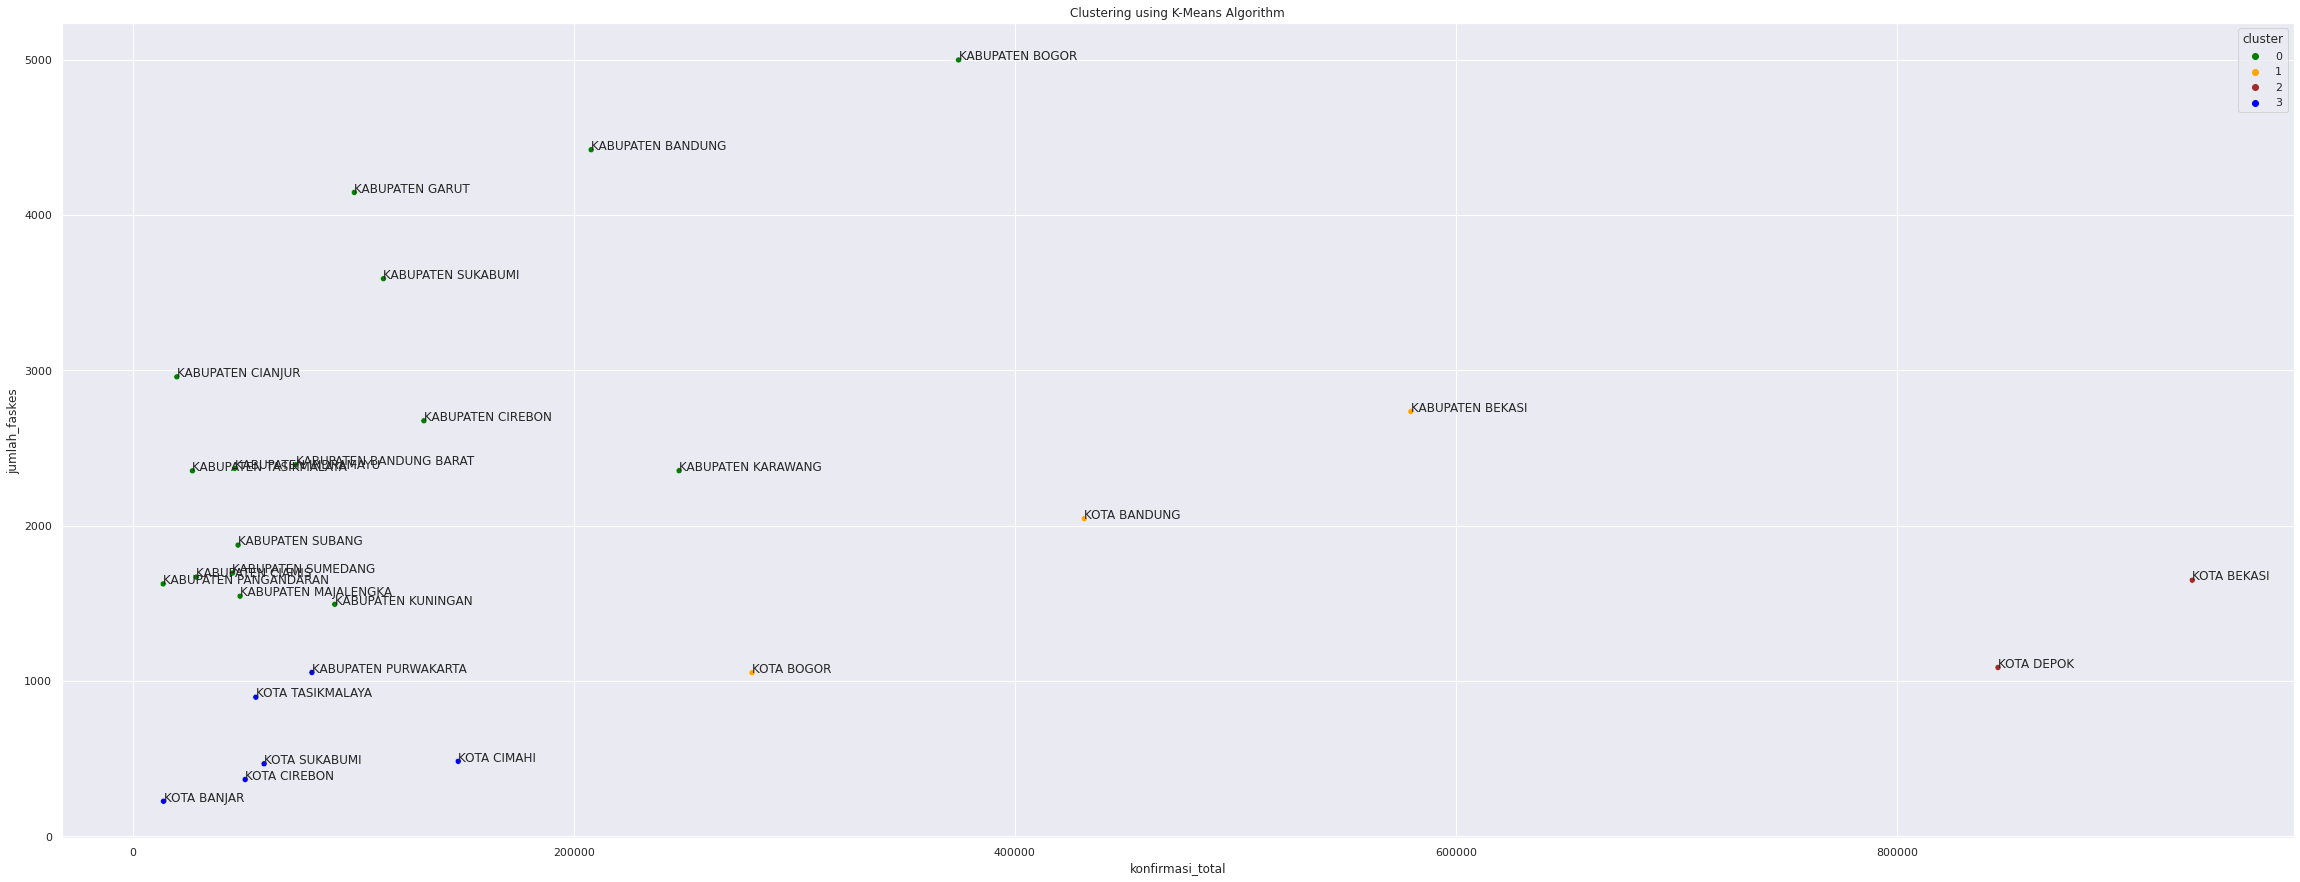

In [ ]:
plt.figure(figsize=(40,15))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x= "konfirmasi_total", y="jumlah_faskes", 
                   hue=clusters4_2020["cluster"],  palette=['green','orange','brown','blue'])

for i, txt in enumerate(clusters4_2020.nama_kab_kota):
    ax.annotate(txt, (clusters4_2020.konfirmasi_total.iat[i],clusters4_2020.jumlah_faskes.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

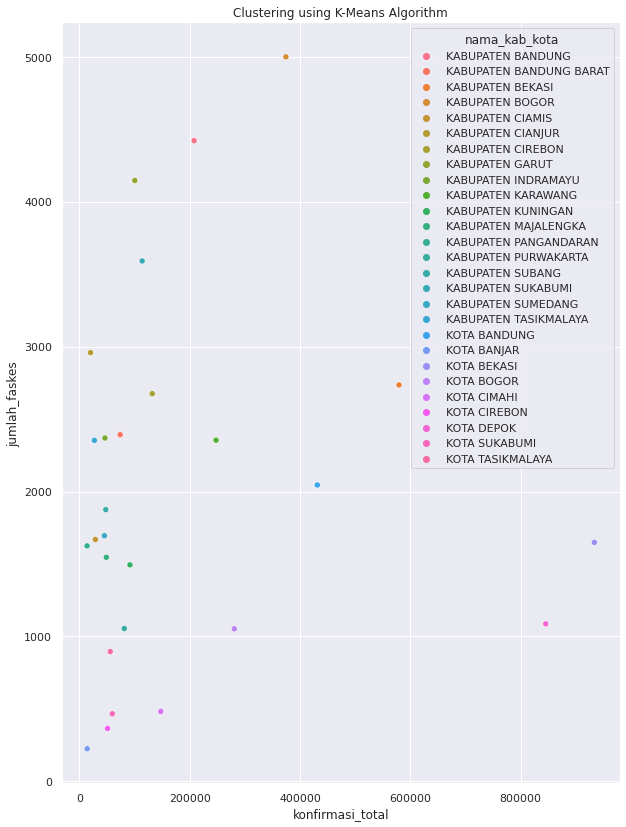

In [ ]:
plt.figure(figsize=(10,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x= "konfirmasi_total", y="jumlah_faskes", hue=clusters4_2020["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

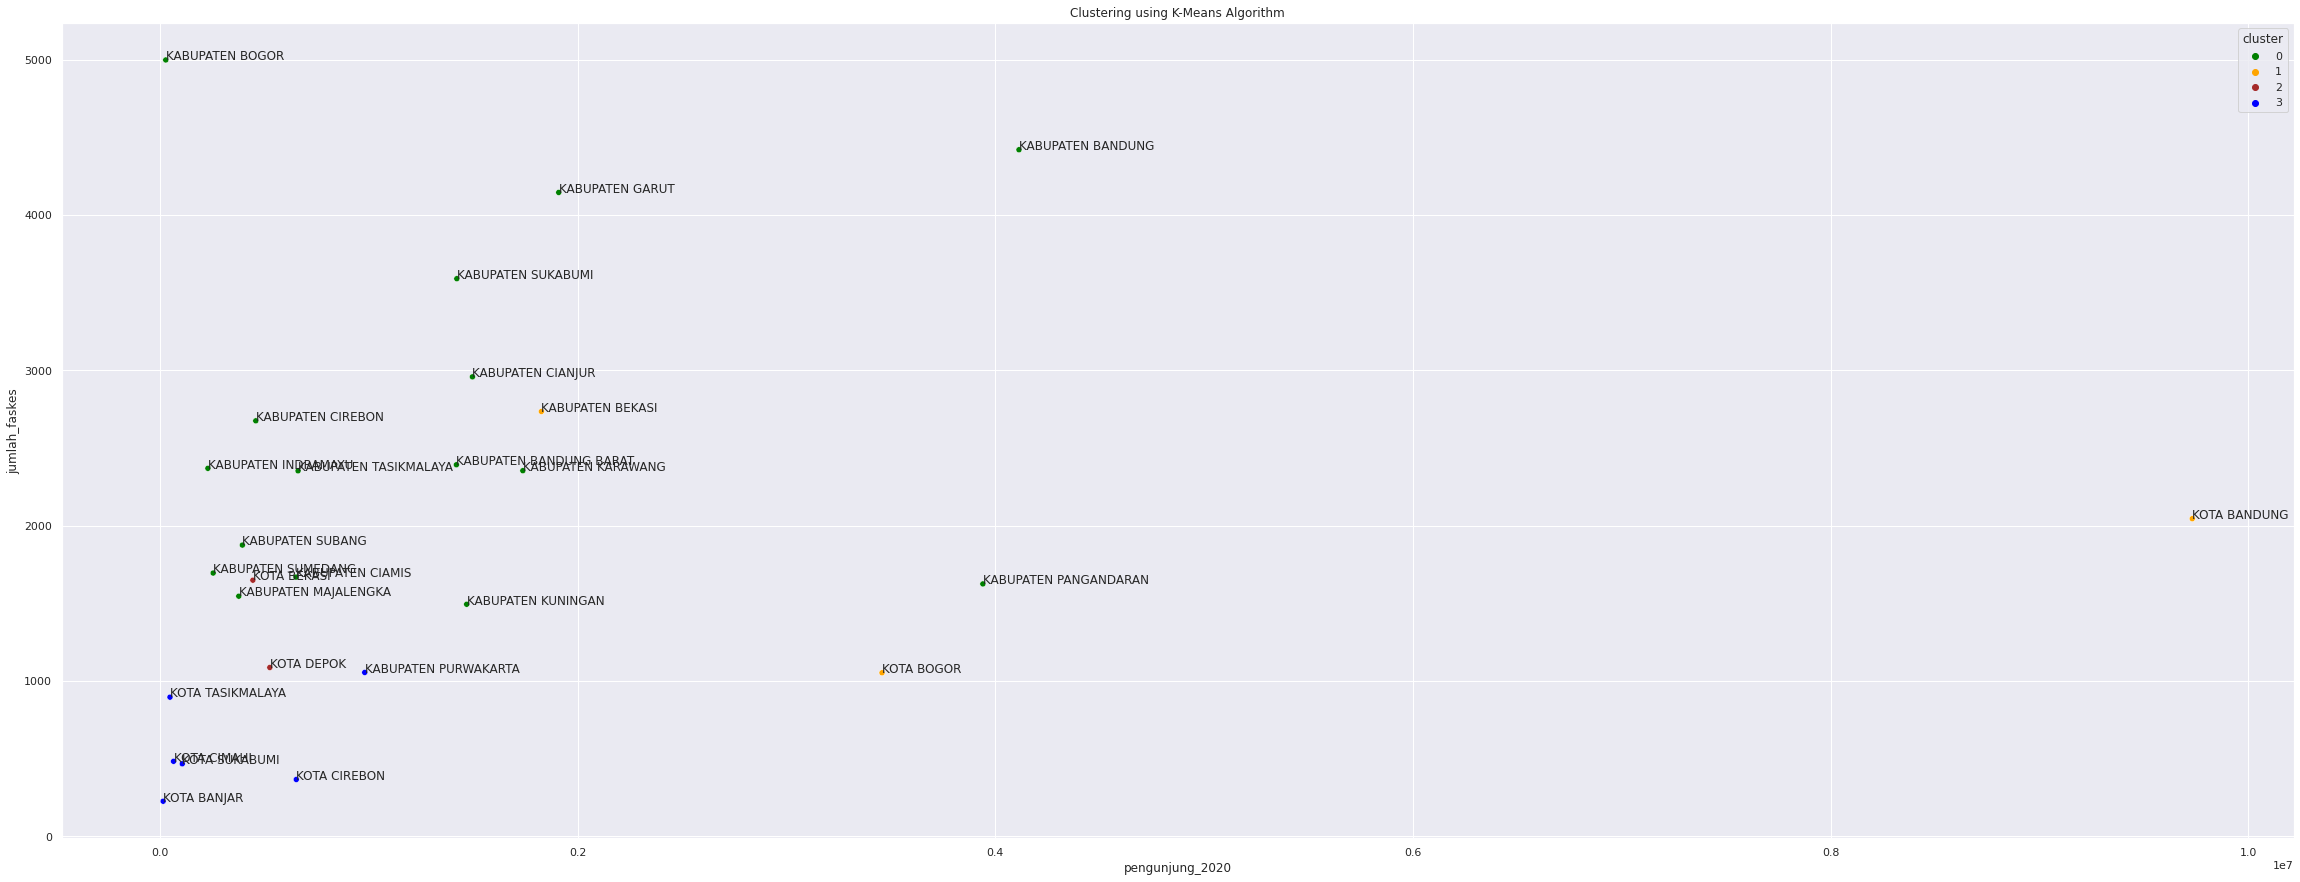

In [ ]:
plt.figure(figsize=(40,15))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x= "pengunjung_2020", y="jumlah_faskes", 
                   hue=clusters4_2020["cluster"], palette=['green','orange','brown','blue'])

for i, txt in enumerate(clusters4_2020.nama_kab_kota):
    ax.annotate(txt, (clusters4_2020.pengunjung_2020.iat[i],clusters4_2020.jumlah_faskes.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

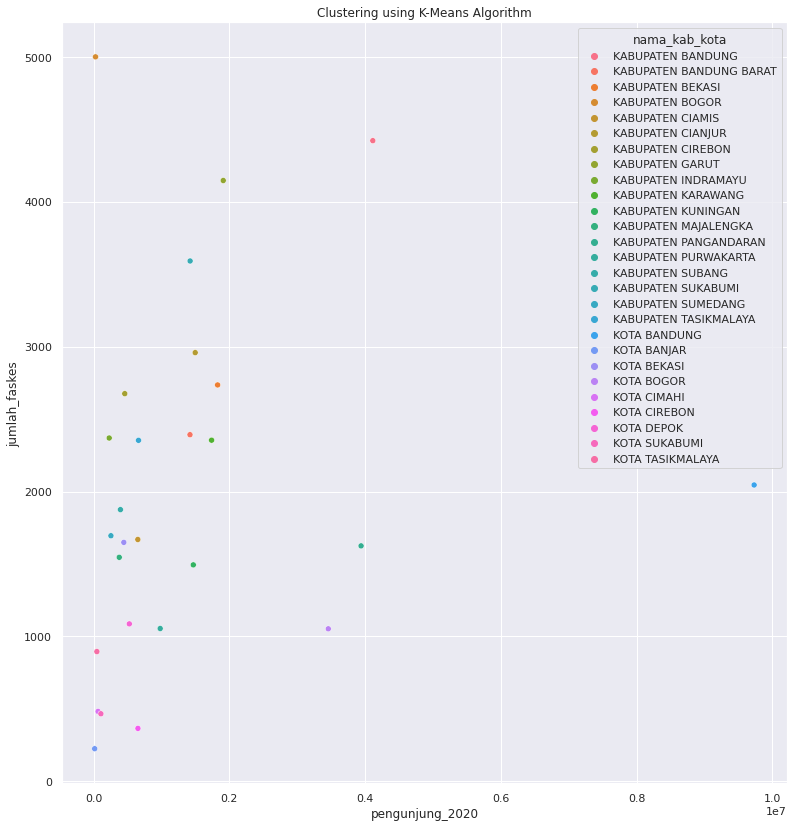

In [ ]:
plt.figure(figsize=(13,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x= "pengunjung_2020", y="jumlah_faskes", hue=clusters4_2020["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

Positive Rate

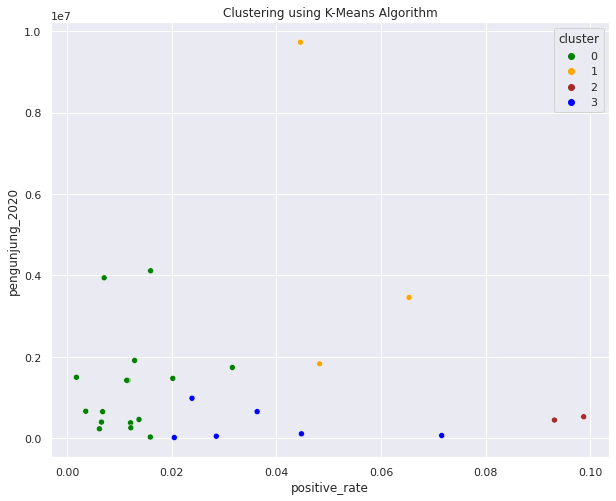

In [ ]:
plt.figure(figsize=(10,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x= "positive_rate", y="pengunjung_2020", 
                   hue=clusters4_2020["cluster"], palette=['green','orange','brown','blue'])

# for i, txt in enumerate(clusters4_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters4_2020.konfirmasi_total.iat[i],clusters4_2020.pengunjung_2020.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

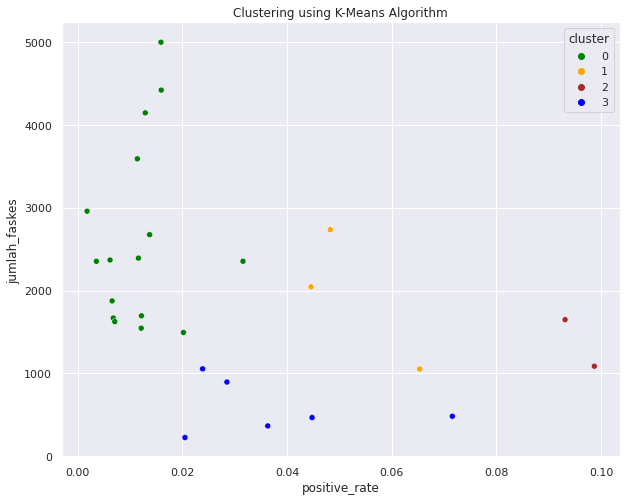

In [ ]:
plt.figure(figsize=(10,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2020, x= "positive_rate", y="jumlah_faskes", 
                   hue=clusters4_2020["cluster"],  palette=['green','orange','brown','blue'])

# for i, txt in enumerate(clusters4_2020.nama_kab_kota):
#     ax.annotate(txt, (clusters4_2020.konfirmasi_total.iat[i],clusters4_2020.jumlah_faskes.iat[i]))

plt.title("Clustering using K-Means Algorithm")
plt.show()

###### Boxplot

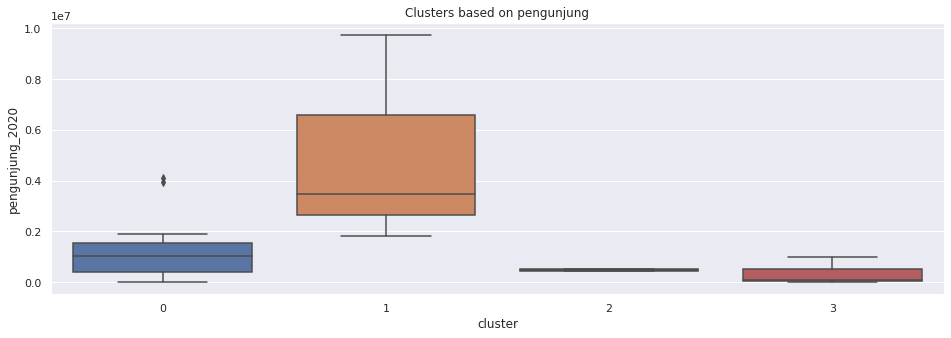

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='pengunjung_2020', showfliers=True)
plt.show()

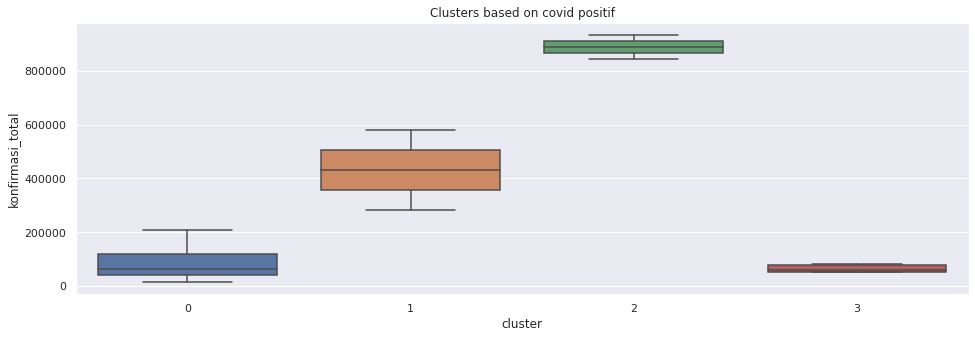

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='konfirmasi_total', showfliers=False)
plt.show()

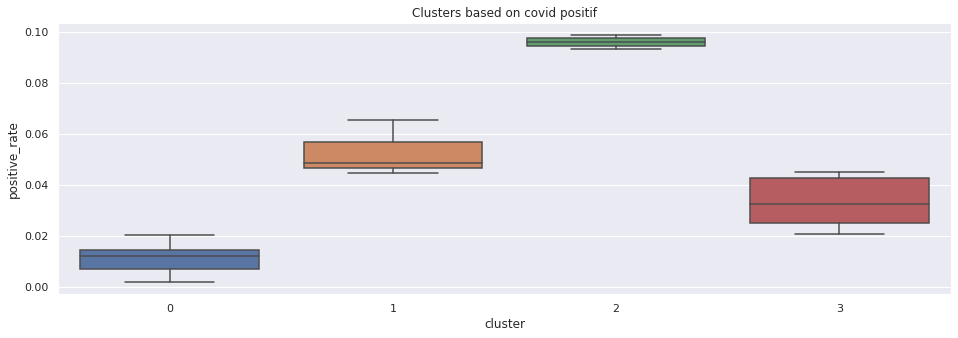

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='positive_rate', showfliers=False)
plt.show()

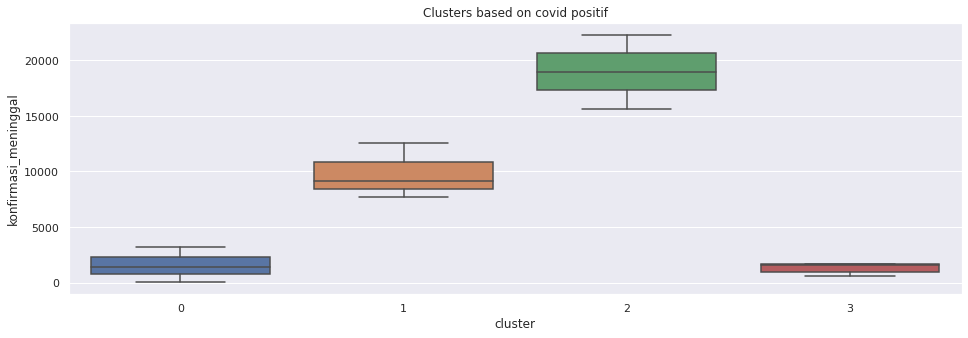

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='konfirmasi_meninggal', showfliers=False)
plt.show()

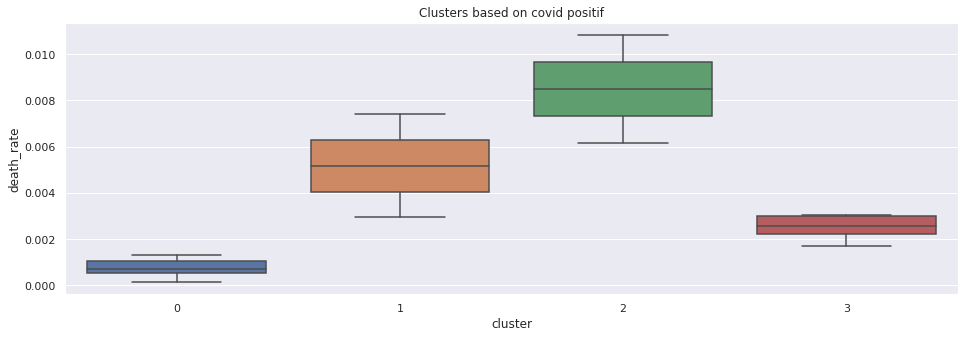

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='death_rate', showfliers=False)
plt.show()

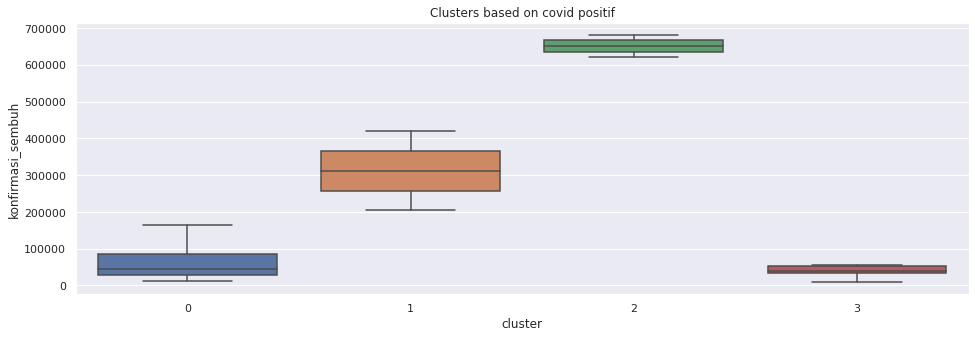

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='konfirmasi_sembuh', showfliers=False)
plt.show()

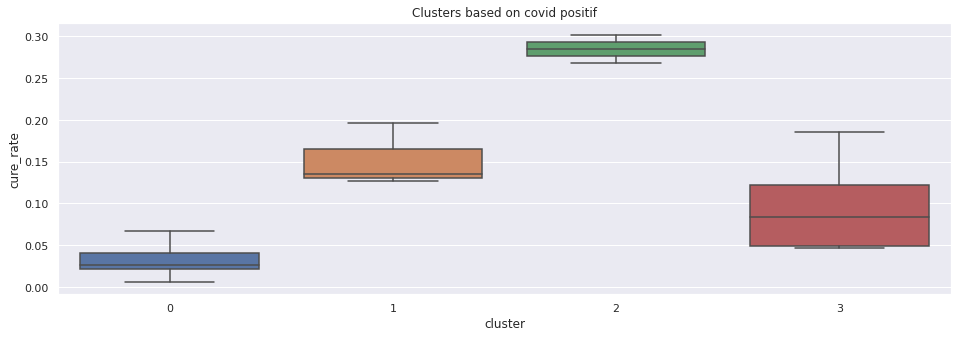

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on covid positif')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='cure_rate', showfliers=False)
plt.show()

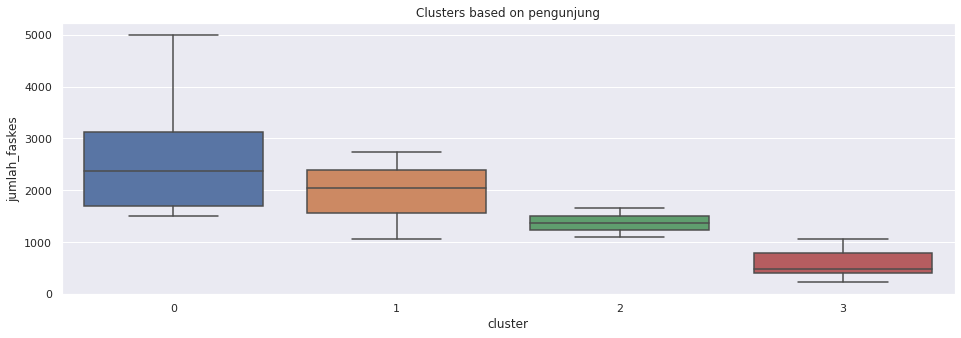

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters4_2020, x='cluster', y='jumlah_faskes', showfliers=False)
plt.show()

# Modelling for Data 2019 (Before COVID-19)

### Checking outlier for data 2019

In [ ]:
#took numericaldata type
nums2=newdf2019.select_dtypes(include=['int64','float64'])

#see outliers for numerical data
for k, v in nums2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nums2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column pengunjung_2019 outliers = 11.11%
Column jumlah_faskes outliers = 3.70%


In [ ]:
# Remove outlier outside 1,5 IQR for train data (x)

cols=newdf2019.select_dtypes(include=['int64','float64']).columns
print(f'Jumlah baris sebelum memfilter outlier: {len(newdf2019)}')

filtered_entries = np.array([True] * len(newdf2019))
for col in range(len(cols)):
    Q1 = newdf2019[cols[col]].quantile(0.25)
    Q3 = newdf2019[cols[col]].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((newdf2019[cols[col]] >= low_limit) & (newdf2019[cols[col]] <= high_limit)) & filtered_entries
    
dfo_2019 = newdf2019[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo_2019)}')

Jumlah baris sebelum memfilter outlier: 27
Jumlah baris setelah memfilter outlier: 23


*   Dengan menimbang sedikitnya entry data yang ada pada data set maka data tidak dihilangkan dari outliernya

## Minmax Scaller 

In [ ]:
#define nums cats pipeline
minmax = Pipeline([('std_scaler', MinMaxScaler())])

In [ ]:
df2019n=minmax.fit_transform(newdf2019.select_dtypes(include=['int64','float64']))

## Choosing Method clustering 2019

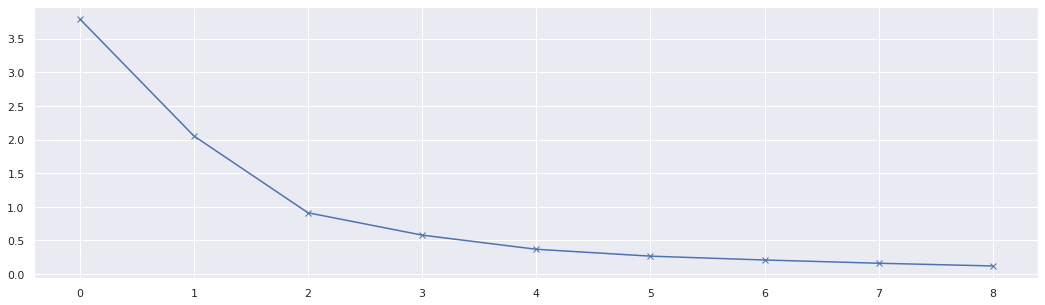

In [ ]:
#finding best K
n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmeans=KMeans(i)
    kmeans.fit(df2019n)
    cost.append(kmeans.inertia_)  

y_pred = kmeans.fit_predict(df2019n)

#view best K
plt.plot(cost,'bx-')


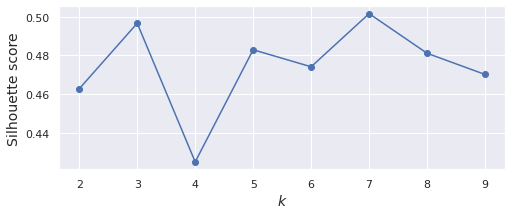

In [ ]:
silhouette_score(df2019n, kmeans.labels_)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df2019n) for k in range(1, 10)]

silhouette_scores = [silhouette_score(df2019n, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

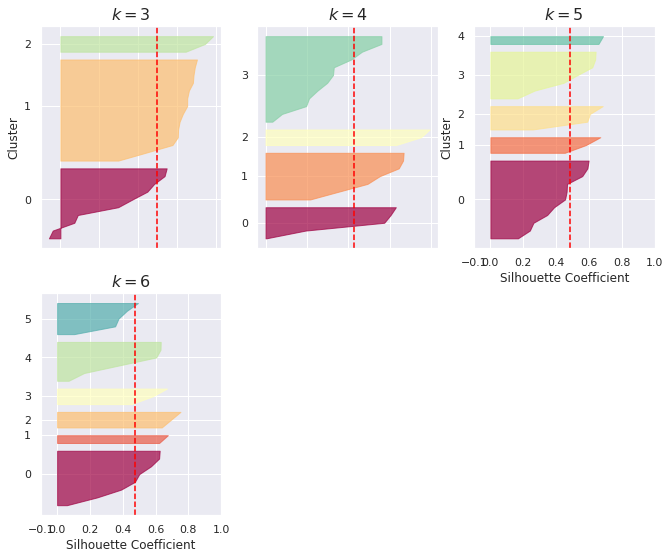

In [ ]:
plt.figure(figsize=(11, 9))

for k in (3,4,5,6):
    plt.subplot(2, 3, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df2019n, y_pred)

    padding = len(df2019n) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [ ]:
range_val = range(2,15)
silhouette = []

for i in range_val:
    ag = AgglomerativeClustering(n_clusters=i)
    ag.fit(df2019n)
    sscore = silhouette_score(df2019n, ag.labels_)
    silhouette.append(sscore)

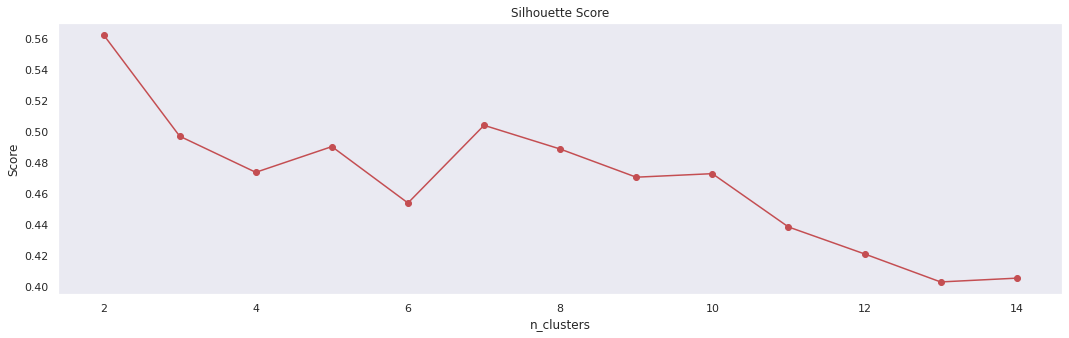

In [ ]:
plt.plot(range_val,silhouette,'ro-')
plt.xlabel('n_clusters')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.grid()

plt.show()

In [ ]:
sscore_ag = silhouette_score(df2019n,ag.labels_)
sscore_km = silhouette_score(df2019n,kmeans.labels_)
print(f"SScore Ag: {sscore_ag}, SScore Kmeans: {sscore_km}")

SScore Ag: 0.4051093862311473, SScore Kmeans: 0.47020592713150694


* Metode yang kami pakai sesuai dengan score yang telah dihitung 
adalah **K-Means**

### Model Data 2019

#### K-7 Clustering (Sesuai dengan silhouette score) 

In [ ]:
kmeans=KMeans(n_clusters=7,random_state=78)
kmeans.fit(df2019n)
labels=kmeans.labels_

In [ ]:
kmeans.predict(df2019n)

array([3, 3, 3, 1, 1, 6, 2, 2, 2, 6, 5, 4, 5, 5, 0, 4, 5, 0, 0, 0, 5, 0,
       0, 4, 4, 4, 4], dtype=int32)

In [ ]:
clusters2_2019=pd.concat([newdf2019, pd.DataFrame({'cluster':labels})], axis=1)
clusters2_2019=clusters2_2019.dropna().rename(columns={'nama_kabupaten_kota':'nama_kab_kota'})

In [ ]:
clusters2_2019

,nama_kab_kota,pengunjung_2019,jumlah_faskes,cluster
0,KOTA BANDUNG,10853314,2045,3
1,KABUPATEN KARAWANG,10080168,2354,3
2,KOTA BOGOR,9160884,1053,3
3,KABUPATEN BANDUNG BARAT,5517072,2392,1
4,KABUPATEN CIANJUR,4900805,2958,1
5,KABUPATEN PANGANDARAN,3227296,1625,6
6,KABUPATEN GARUT,2922225,4145,2
7,KABUPATEN BOGOR,2696467,4998,2
8,KABUPATEN BANDUNG,2579578,4420,2
9,KABUPATEN PURWAKARTA,2208466,1055,6


In [ ]:
clusters2_2019g = clusters2_2019.groupby('cluster')['nama_kab_kota'].agg(['unique'])

In [ ]:
clusters2_2019g.reset_index()

,cluster,unique
0,0,"[KABUPATEN SUBANG, KOTA BEKASI, KABUPATEN CIAM..."
1,1,"[KABUPATEN BANDUNG BARAT, KABUPATEN CIANJUR]"
2,2,"[KABUPATEN GARUT, KABUPATEN BOGOR, KABUPATEN B..."
3,3,"[KOTA BANDUNG, KABUPATEN KARAWANG, KOTA BOGOR]"
4,4,"[KOTA CIREBON, KOTA TASIKMALAYA, KOTA BANJAR, ..."
5,5,"[KABUPATEN BEKASI, KABUPATEN INDRAMAYU, KABUPA..."
6,6,"[KABUPATEN PANGANDARAN, KABUPATEN PURWAKARTA]"


In [ ]:
clusters2_2019g['unique'].tolist()

[array(['KABUPATEN SUBANG', 'KOTA BEKASI', 'KABUPATEN CIAMIS',
        'KABUPATEN MAJALENGKA', 'KABUPATEN KUNINGAN', 'KABUPATEN SUMEDANG'],
       dtype=object),
 array(['KABUPATEN BANDUNG BARAT', 'KABUPATEN CIANJUR'], dtype=object),
 array(['KABUPATEN GARUT', 'KABUPATEN BOGOR', 'KABUPATEN BANDUNG'],
       dtype=object),
 array(['KOTA BANDUNG', 'KABUPATEN KARAWANG', 'KOTA BOGOR'], dtype=object),
 array(['KOTA CIREBON', 'KOTA TASIKMALAYA', 'KOTA BANJAR', 'KOTA CIMAHI',
        'KOTA DEPOK', 'KOTA SUKABUMI'], dtype=object),
 array(['KABUPATEN BEKASI', 'KABUPATEN INDRAMAYU', 'KABUPATEN TASIKMALAYA',
        'KABUPATEN SUKABUMI', 'KABUPATEN CIREBON'], dtype=object),
 array(['KABUPATEN PANGANDARAN', 'KABUPATEN PURWAKARTA'], dtype=object)]

##### Visualisasi Clustering 

###### Scatterplot

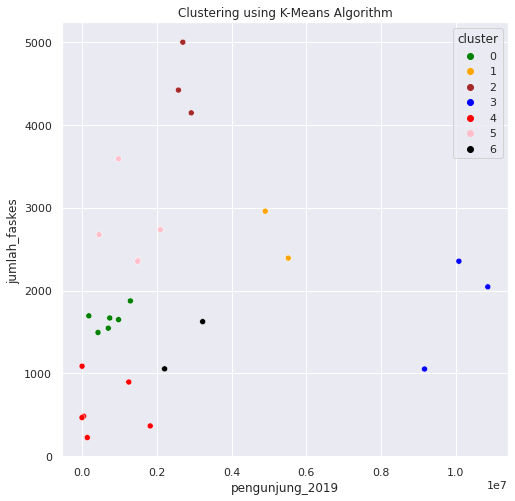

In [ ]:
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2019, x= "pengunjung_2019", y="jumlah_faskes", 
                   hue=clusters2_2019["cluster"],  palette=['green','orange','brown','blue','red','pink','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

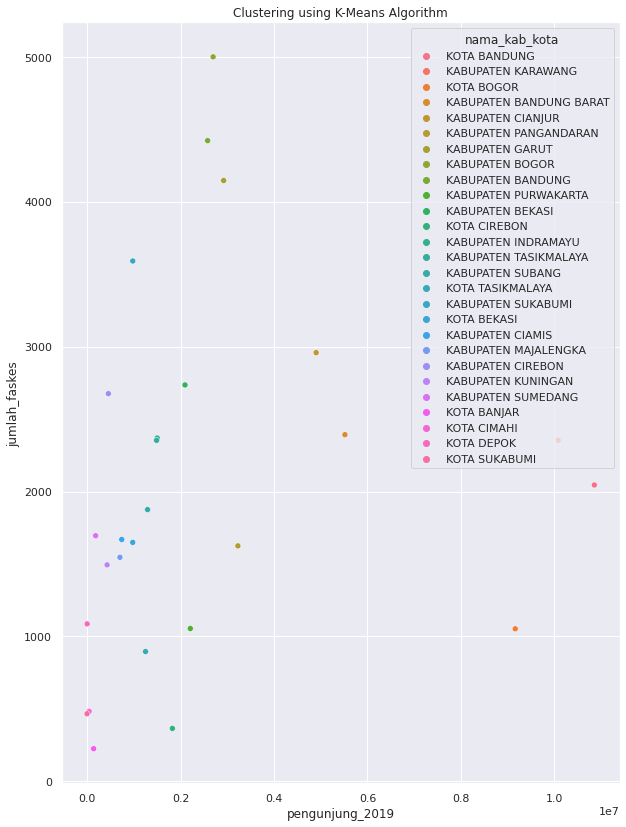

In [ ]:
plt.figure(figsize=(10,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2019, x= "pengunjung_2019", y="jumlah_faskes", hue=clusters2_2019["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

###### Boxplot

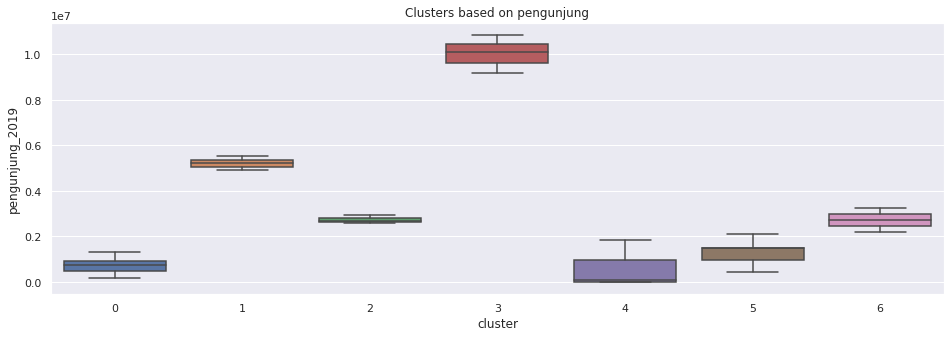

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters2_2019, x='cluster', y='pengunjung_2019', showfliers=True)
plt.show()

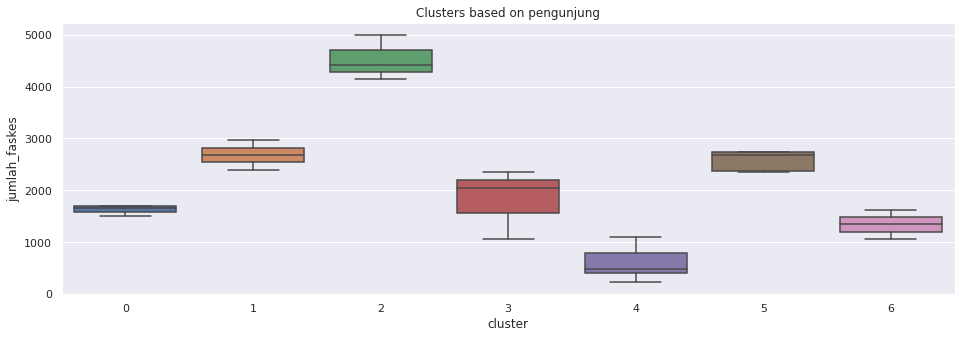

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters2_2019, x='cluster', y='jumlah_faskes', showfliers=False)
plt.show()

#### K-4 Clustering 

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=78)
kmeans.fit(df2019n)
labels=kmeans.labels_

In [ ]:
kmeans.predict(df2019n)

array([2, 2, 2, 3, 3, 3, 1, 1, 1, 0, 3, 0, 3, 3, 3, 0, 1, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0], dtype=int32)

In [ ]:
clusters4_2019=pd.concat([newdf2019, pd.DataFrame({'cluster':labels})], axis=1)
clusters4_2019=clusters4_2019.dropna().rename(columns={'nama_kabupaten_kota':'nama_kab_kota'})

In [ ]:
clusters4_2019

,nama_kab_kota,pengunjung_2019,jumlah_faskes,cluster
0,KOTA BANDUNG,10853314,2045,2
1,KABUPATEN KARAWANG,10080168,2354,2
2,KOTA BOGOR,9160884,1053,2
3,KABUPATEN BANDUNG BARAT,5517072,2392,3
4,KABUPATEN CIANJUR,4900805,2958,3
5,KABUPATEN PANGANDARAN,3227296,1625,3
6,KABUPATEN GARUT,2922225,4145,1
7,KABUPATEN BOGOR,2696467,4998,1
8,KABUPATEN BANDUNG,2579578,4420,1
9,KABUPATEN PURWAKARTA,2208466,1055,0


In [ ]:
clusters4_2019g = clusters4_2019.groupby('cluster')['nama_kab_kota'].agg(['unique'])

In [ ]:
clusters4_2019g.reset_index()

,cluster,unique
0,0,"[KABUPATEN PURWAKARTA, KOTA CIREBON, KOTA TASI..."
1,1,"[KABUPATEN GARUT, KABUPATEN BOGOR, KABUPATEN B..."
2,2,"[KOTA BANDUNG, KABUPATEN KARAWANG, KOTA BOGOR]"
3,3,"[KABUPATEN BANDUNG BARAT, KABUPATEN CIANJUR, K..."


In [ ]:
clusters4_2019g['unique'].tolist()

[array(['KABUPATEN PURWAKARTA', 'KOTA CIREBON', 'KOTA TASIKMALAYA',
        'KOTA BEKASI', 'KABUPATEN CIAMIS', 'KABUPATEN MAJALENGKA',
        'KABUPATEN KUNINGAN', 'KABUPATEN SUMEDANG', 'KOTA BANJAR',
        'KOTA CIMAHI', 'KOTA DEPOK', 'KOTA SUKABUMI'], dtype=object),
 array(['KABUPATEN GARUT', 'KABUPATEN BOGOR', 'KABUPATEN BANDUNG',
        'KABUPATEN SUKABUMI'], dtype=object),
 array(['KOTA BANDUNG', 'KABUPATEN KARAWANG', 'KOTA BOGOR'], dtype=object),
 array(['KABUPATEN BANDUNG BARAT', 'KABUPATEN CIANJUR',
        'KABUPATEN PANGANDARAN', 'KABUPATEN BEKASI', 'KABUPATEN INDRAMAYU',
        'KABUPATEN TASIKMALAYA', 'KABUPATEN SUBANG', 'KABUPATEN CIREBON'],
       dtype=object)]

##### Visualisasi Clustering 

###### Scatterplot

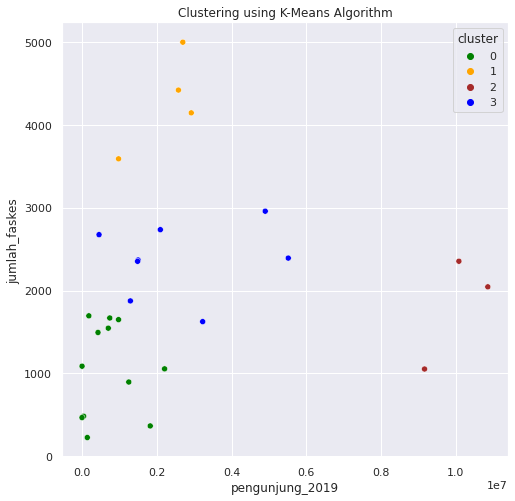

In [ ]:
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2019, x= "pengunjung_2019", y="jumlah_faskes", 
                   hue=clusters4_2019["cluster"], palette=['green','orange','brown','blue'])

plt.title("Clustering using K-Means Algorithm")
plt.show()

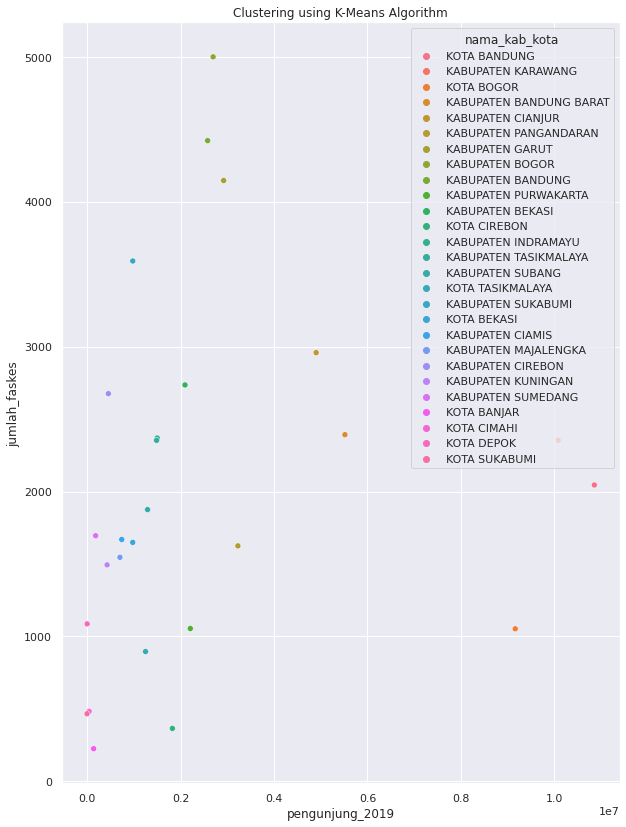

In [ ]:
plt.figure(figsize=(10,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2019, x= "pengunjung_2019", y="jumlah_faskes", hue=clusters4_2019["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

###### Boxplot

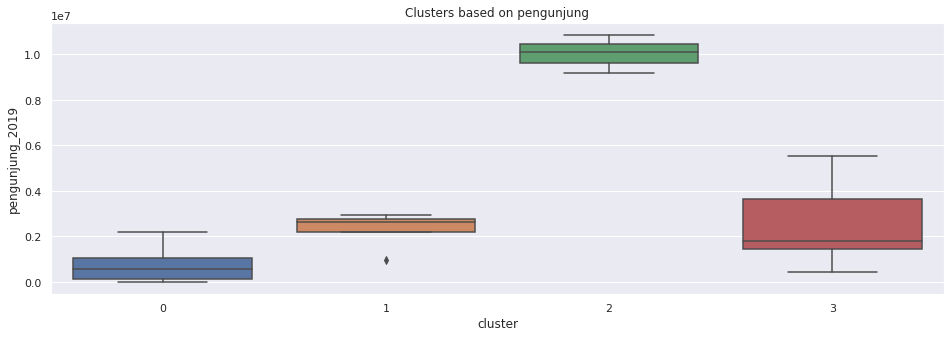

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters4_2019, x='cluster', y='pengunjung_2019', showfliers=True)
plt.show()

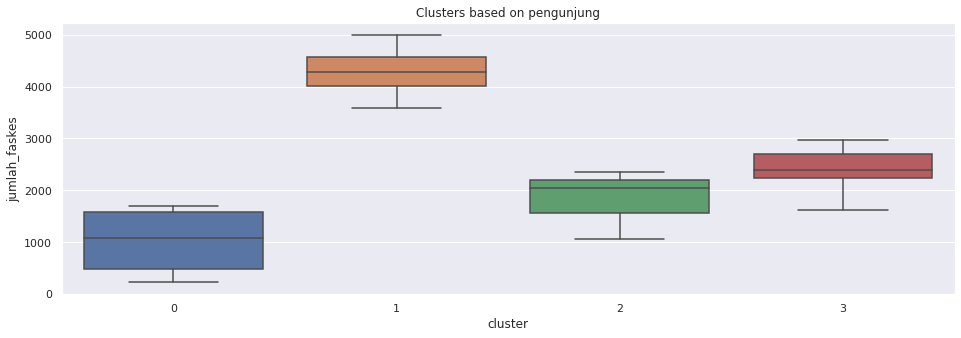

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters4_2019, x='cluster', y='jumlah_faskes', showfliers=False)
plt.show()

# Modelling for Data 2018 (Before COVID-19)

### Checking outlier for data 2018

In [ ]:
#took numericaldata type
nums2=newdf2018.select_dtypes(include=['int64','float64'])

#see outliers for numerical data
for k, v in nums2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nums2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column pengunjung_2018 outliers = 7.41%
Column jumlah_faskes outliers = 3.70%


In [ ]:
# Remove outlier outside 1,5 IQR for train data (x)

cols=newdf2018.select_dtypes(include=['int64','float64']).columns
print(f'Jumlah baris sebelum memfilter outlier: {len(newdf2018)}')

filtered_entries = np.array([True] * len(newdf2018))
for col in range(len(cols)):
    Q1 = newdf2018[cols[col]].quantile(0.25)
    Q3 = newdf2018[cols[col]].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((newdf2018[cols[col]] >= low_limit) & (newdf2018[cols[col]] <= high_limit)) & filtered_entries
    
dfo_2018 = newdf2018[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dfo_2018)}')

Jumlah baris sebelum memfilter outlier: 27
Jumlah baris setelah memfilter outlier: 24


*   Dengan menimbang sedikitnya entry data yang ada pada data set maka data tidak dihilangkan dari outliernya

## Minmax Scaller 

In [ ]:
#define nums cats pipeline
minmax = Pipeline([('std_scaler', MinMaxScaler())])

In [ ]:
df2018n=minmax.fit_transform(newdf2018.select_dtypes(include=['int64','float64']))

## Choosing Method clustering 2018

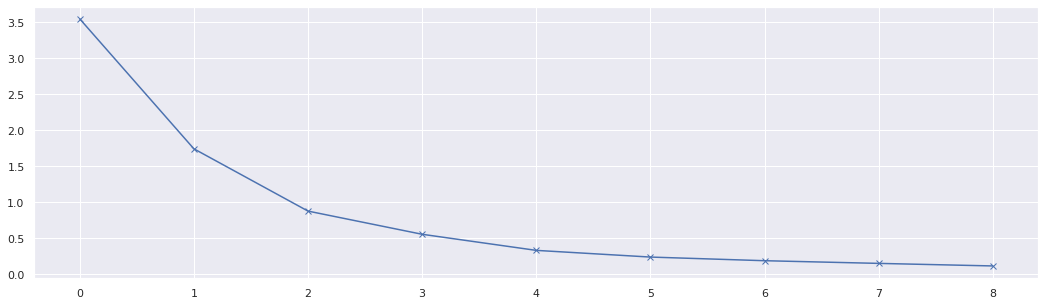

In [ ]:
#finding best K
n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmeans=KMeans(i)
    kmeans.fit(df2018n)
    cost.append(kmeans.inertia_)  

y_pred = kmeans.fit_predict(df2018n)

#view best K
plt.plot(cost,'bx-')


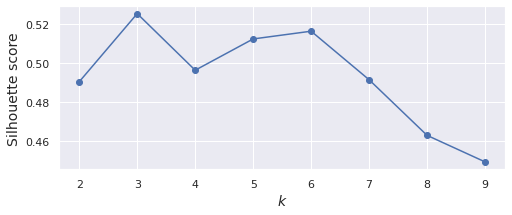

In [ ]:
silhouette_score(df2018n, kmeans.labels_)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df2018n) for k in range(1, 10)]

silhouette_scores = [silhouette_score(df2018n, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

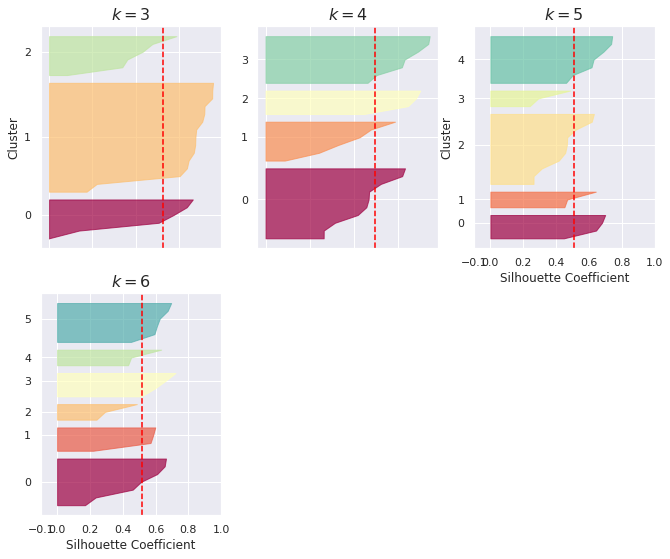

In [ ]:
plt.figure(figsize=(11, 9))

for k in (3,4,5,6):
    plt.subplot(2, 3, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df2018n, y_pred)

    padding = len(df2018n) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [ ]:
range_val = range(2,15)
silhouette = []

for i in range_val:
    ag = AgglomerativeClustering(n_clusters=i)
    ag.fit(df2018n)
    sscore = silhouette_score(df2018n, ag.labels_)
    silhouette.append(sscore)

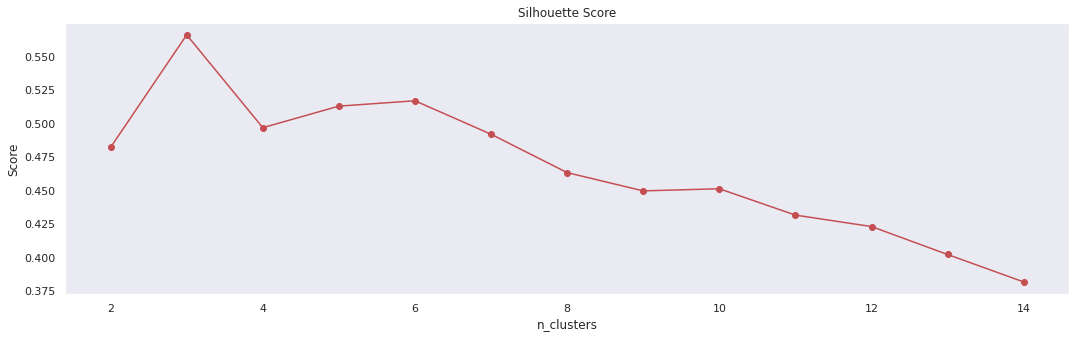

In [ ]:
plt.plot(range_val,silhouette,'ro-')
plt.xlabel('n_clusters')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.grid()

plt.show()

In [ ]:
sscore_ag = silhouette_score(df2018n,ag.labels_)
sscore_km = silhouette_score(df2018n,kmeans.labels_)
print(f"SScore Ag: {sscore_ag}, SScore Kmeans: {sscore_km}")

SScore Ag: 0.38144595610174586, SScore Kmeans: 0.449322194926669


* Metode yang kami pakai sesuai dengan score yang telah dihitung 
adalah **K-Means**

### Model Data 2018

#### K-3 Clustering (Sesuai dengan nilai silhouette score) 

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=78)
kmeans.fit(df2018n)
labels=kmeans.labels_

In [ ]:
kmeans.predict(df2018n)

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [ ]:
clusters2_2018=pd.concat([newdf2018, pd.DataFrame({'cluster':labels})], axis=1)
clusters2_2018=clusters2_2018.dropna().rename(columns={'nama_kabupaten_kota':'nama_kab_kota'})

In [ ]:
clusters2_2018

,nama_kab_kota,pengunjung_2018,jumlah_faskes,cluster
0,KABUPATEN BANDUNG BARAT,13823714,2392,0
1,KOTA BANDUNG,10472498,2045,0
2,KABUPATEN CIANJUR,9592520,2958,0
3,KABUPATEN KARAWANG,6707383,2354,0
4,KABUPATEN SUBANG,6284423,1875,0
5,KABUPATEN PURWAKARTA,6114839,1055,0
6,KABUPATEN BOGOR,4421363,4998,2
7,KABUPATEN SUKABUMI,3666941,3590,2
8,KABUPATEN GARUT,2787756,4145,2
9,KABUPATEN KUNINGAN,2313784,1494,1


In [ ]:
clusters2_2018g = clusters2_2018.groupby('cluster')['nama_kab_kota'].agg(['unique'])

In [ ]:
clusters2_2018g.reset_index()

,cluster,unique
0,0,"[KABUPATEN BANDUNG BARAT, KOTA BANDUNG, KABUPA..."
1,1,"[KABUPATEN KUNINGAN, KOTA CIREBON, KABUPATEN C..."
2,2,"[KABUPATEN BOGOR, KABUPATEN SUKABUMI, KABUPATE..."


In [ ]:
clusters2_2018g['unique'].tolist()

[array(['KABUPATEN BANDUNG BARAT', 'KOTA BANDUNG', 'KABUPATEN CIANJUR',
        'KABUPATEN KARAWANG', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA'],
       dtype=object),
 array(['KABUPATEN KUNINGAN', 'KOTA CIREBON', 'KABUPATEN CIAMIS',
        'KABUPATEN TASIKMALAYA', 'KOTA BEKASI', 'KABUPATEN INDRAMAYU',
        'KABUPATEN SUMEDANG', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA',
        'KABUPATEN MAJALENGKA', 'KOTA BOGOR', 'KOTA BANJAR', 'KOTA DEPOK',
        'KOTA CIMAHI', 'KABUPATEN PANGANDARAN'], dtype=object),
 array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN GARUT',
        'KABUPATEN BEKASI', 'KABUPATEN BANDUNG', 'KABUPATEN CIREBON'],
       dtype=object)]

##### Visualisasi Clustering 

###### Scatterplot

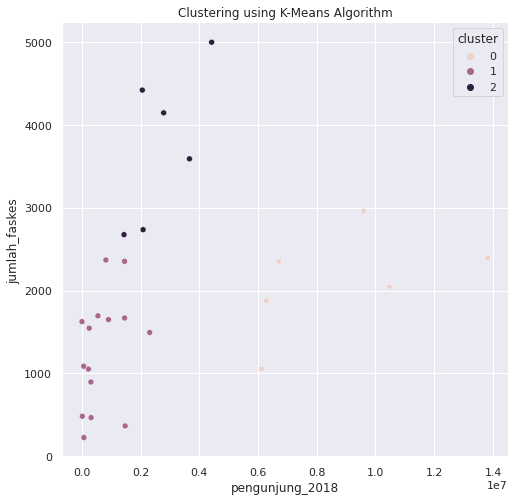

In [ ]:
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2018, x= "pengunjung_2018", y="jumlah_faskes", hue=clusters2_2018["cluster"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

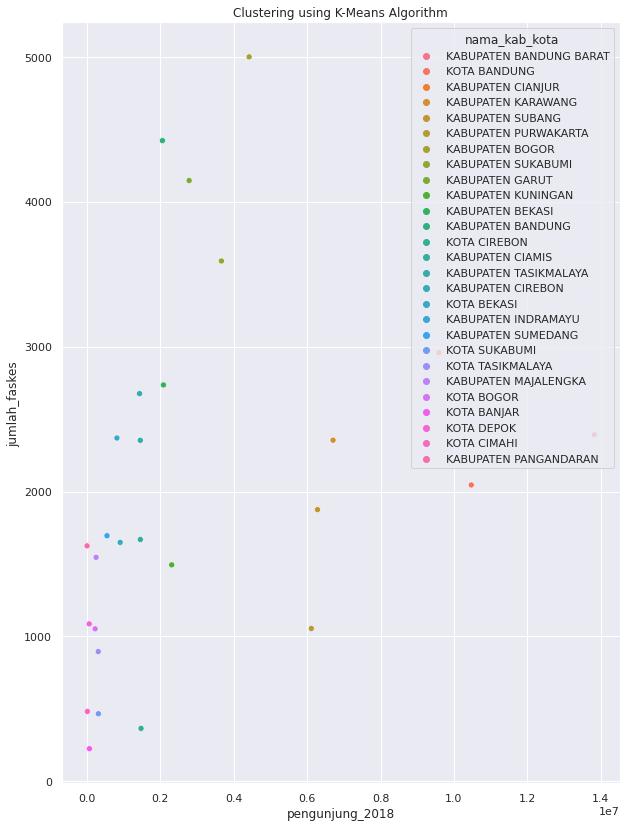

In [ ]:
plt.figure(figsize=(10,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters2_2018, x= "pengunjung_2018", y="jumlah_faskes", hue=clusters2_2018["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

###### Boxplot

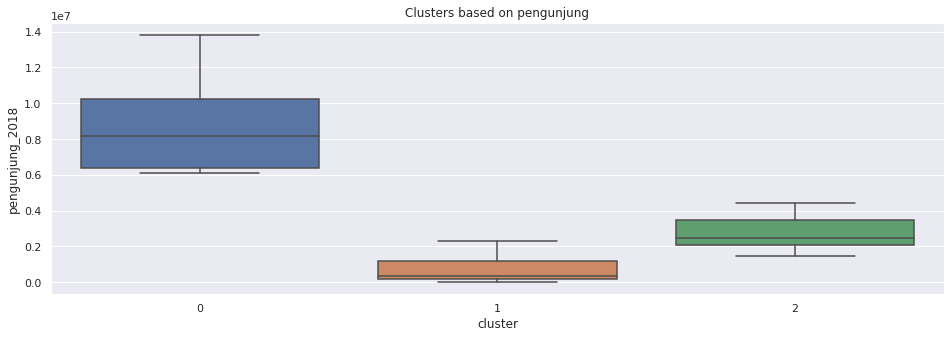

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters2_2018, x='cluster', y='pengunjung_2018', showfliers=True)
plt.show()

#### K-4 Clustering

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=78)
kmeans.fit(df2018n)
labels=kmeans.labels_

In [ ]:
kmeans.predict(df2018n)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       2, 2, 2, 2, 3], dtype=int32)

In [ ]:
clusters4_2018=pd.concat([newdf2018, pd.DataFrame({'cluster':labels})], axis=1)
clusters4_2018=clusters4_2018.dropna().rename(columns={'nama_kabupaten_kota':'nama_kab_kota'})

In [ ]:
clusters4_2018

,nama_kab_kota,pengunjung_2018,jumlah_faskes,cluster
0,KABUPATEN BANDUNG BARAT,13823714,2392,1
1,KOTA BANDUNG,10472498,2045,1
2,KABUPATEN CIANJUR,9592520,2958,1
3,KABUPATEN KARAWANG,6707383,2354,1
4,KABUPATEN SUBANG,6284423,1875,1
5,KABUPATEN PURWAKARTA,6114839,1055,1
6,KABUPATEN BOGOR,4421363,4998,0
7,KABUPATEN SUKABUMI,3666941,3590,0
8,KABUPATEN GARUT,2787756,4145,0
9,KABUPATEN KUNINGAN,2313784,1494,3


In [ ]:
clusters4_2018g = clusters4_2018.groupby('cluster')['nama_kab_kota'].agg(['unique'])

In [ ]:
clusters4_2018g.reset_index()

,cluster,unique
0,0,"[KABUPATEN BOGOR, KABUPATEN SUKABUMI, KABUPATE..."
1,1,"[KABUPATEN BANDUNG BARAT, KOTA BANDUNG, KABUPA..."
2,2,"[KOTA CIREBON, KOTA SUKABUMI, KOTA TASIKMALAYA..."
3,3,"[KABUPATEN KUNINGAN, KABUPATEN BEKASI, KABUPAT..."


In [ ]:
clusters4_2018g['unique'].tolist()

[array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN GARUT',
        'KABUPATEN BANDUNG'], dtype=object),
 array(['KABUPATEN BANDUNG BARAT', 'KOTA BANDUNG', 'KABUPATEN CIANJUR',
        'KABUPATEN KARAWANG', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA'],
       dtype=object),
 array(['KOTA CIREBON', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA', 'KOTA BOGOR',
        'KOTA BANJAR', 'KOTA DEPOK', 'KOTA CIMAHI'], dtype=object),
 array(['KABUPATEN KUNINGAN', 'KABUPATEN BEKASI', 'KABUPATEN CIAMIS',
        'KABUPATEN TASIKMALAYA', 'KABUPATEN CIREBON', 'KOTA BEKASI',
        'KABUPATEN INDRAMAYU', 'KABUPATEN SUMEDANG',
        'KABUPATEN MAJALENGKA', 'KABUPATEN PANGANDARAN'], dtype=object)]

##### Visualisasi Clustering 

###### Scatterplot

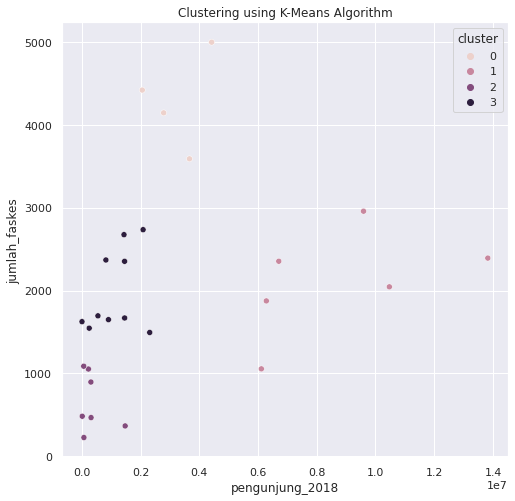

In [ ]:
plt.figure(figsize=(8,8))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2018, x= "pengunjung_2018", y="jumlah_faskes", hue=clusters4_2018["cluster"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

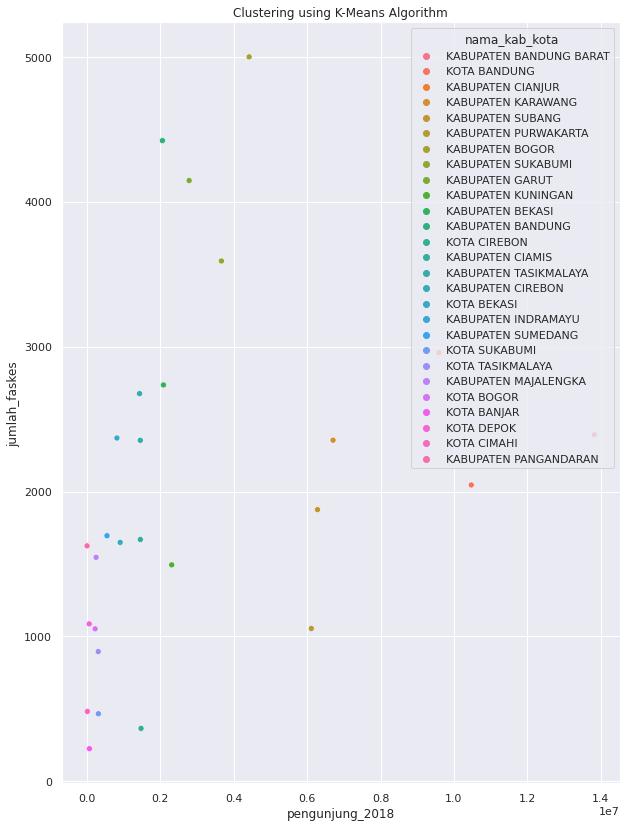

In [ ]:
plt.figure(figsize=(10,14))
#palette=['dodgerblue','red','green','blue','black','pink','gray','purple','coolwarm']
ax=sns.scatterplot(data=clusters4_2018, x= "pengunjung_2018", y="jumlah_faskes", hue=clusters4_2018["nama_kab_kota"])
plt.title("Clustering using K-Means Algorithm")
plt.show()

###### Boxplot

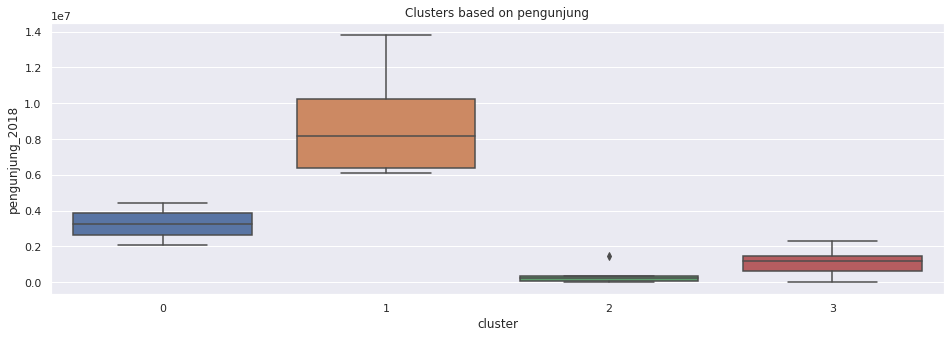

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters4_2018, x='cluster', y='pengunjung_2018', showfliers=True)
plt.show()

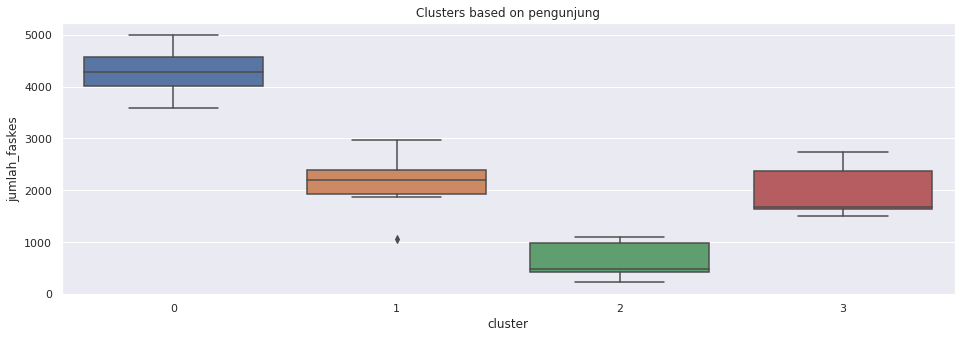

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Clusters based on pengunjung')
ax = sns.boxplot(data=clusters4_2018, x='cluster', y='jumlah_faskes', showfliers=True)
plt.show()

# Summary and Analysis